In [1]:
from mpl_toolkits import mplot3d
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import utilitiesPlotting as up

c:\Users\maril\anaconda3\envs\pythonProject\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load and translate all datafiles to be used in this analysis
First, all the datafiles to be analysed is loaded and translated here at the beginning to have full control of which files are in use

df_IMU1, df_servo and df_IMU2 are the data from the servo experiment without load. The IMU dataframes are before and after the servo actuation respectively

df_IMU1_L, df_servo_L and df_IMU2_L are the data from the servo experiment with load. 

df_servo_a and df_servo_La are the data dataframes wfrom df_servo and df_servo_L respectively, where outliers have been removed using aspen unscrambler

In [2]:
# without load
df_IMU = up.laodTestData("../projectThesisTest1/newCurrentMeas/woLoad/pureIMUdata2023-05-16 09%3A22%3A14.928527.csv")
df_IMU = up.drop_outliers_IQR(df_IMU, sensititvity=3)
df_IMU2 = up.laodTestData("../projectThesisTest1/newCurrentMeas/woLoad/pureIMUdat2a2023-05-16 09%3A22%3A14.928527.csv")
df_IMU2 = up.drop_outliers_IQR(df_IMU, sensititvity=3)
df_servo = up.laodTestData("../projectThesisTest1/newCurrentMeas/woLoad/servoData2023-05-16 09%3A22%3A14.928527.csv", save = False)

df_servo_a = pd.read_csv("../AspenDataFiles/woLoad/NEWservoData2023-05-16woLoadTranslatedOutliersRemoved.csv", sep = ',', header=0, index_col=False)

# with load
df_IMU_L = up.laodTestData("../projectThesisTest1/newCurrentMeas/wLoad/pureIMUdata2023-05-16 08%3A46%3A23.906719.csv")
df_IMU_L = up.drop_outliers_IQR(df_IMU_L, sensititvity=3)
df_IMU2_L = up.laodTestData("../projectThesisTest1/newCurrentMeas/wLoad/pureIMUdat2a2023-05-16 08%3A46%3A23.906719.csv")
df_IMU2_L = up.drop_outliers_IQR(df_IMU_L, sensititvity=3)
df_servo_L = up.laodTestData("../projectThesisTest1/newCurrentMeas/wLoad/servoData2023-05-16 08%3A46%3A23.906719.csv", save = False)

df_servo_La = pd.read_csv("../AspenDataFiles/wLoad/NEWservoDataWithLoadTranslatedOutliersRemoved.csv", sep = ',', header=0, index_col=False)



        mean    std    skew  kurtosis
magX -11.941  0.656   0.140     0.079
magY   5.704  0.480   4.830    75.889
magZ -29.964  0.623  -0.054    -0.040
accX   0.420  0.013  -0.129     1.594
accY   0.378  0.014   0.074     2.917
accZ   9.818  0.089 -13.486   189.699
gyrX   0.000  0.001   0.115     0.005
gyrY   0.000  0.004  27.965   899.562
gyrZ  -0.000  0.005 -25.989   711.860
        mean    std    skew  kurtosis
magX -12.655  0.614  -0.044     0.241
magY   5.711  0.441   2.463    44.753
magZ -31.495  0.708  -0.077    -0.163
accX   0.419  0.013  -0.032     0.606
accY   0.376  0.082 -32.075  1071.406
accZ   9.820  0.067 -17.707   335.670
gyrX   0.000  0.001  -0.009    -0.058
gyrY  -0.000  0.006 -10.765   506.183
gyrZ  -0.000  0.004   0.105  1011.866


c:\Users\maril\OneDrive - NTNU\2. Skole\masters thesis\Magnetic-Noise-Compensation-Master\JustTesting\utilitiesPlotting.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['servoVel'].iloc[index] = convertVel(val)
c:\Users\maril\OneDrive - NTNU\2. Skole\masters thesis\Magnetic-Noise-Compensation-Master\JustTesting\utilitiesPlotting.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['servoCur'].iloc[index] = convertCur(val)


        mean     std    skew  kurtosis
magX  60.228  66.227   0.351    -1.443
magY  -4.513  60.092  -0.094    -1.273
magZ -34.811   4.548   0.476     4.558
accX   0.420   0.014   0.145     1.239
accY   0.380   0.014  -0.080     0.005
accZ   9.821   0.056 -20.467   460.533
gyrX   0.000   0.001  -0.031     0.412
gyrY   0.000   0.013   1.975   107.338
gyrZ   0.001   0.013   6.177   108.003
        mean    std    skew  kurtosis
magX -12.267  0.621  -0.080    -0.038
magY   8.426  0.524   3.409    47.731
magZ -27.706  0.826  16.009   535.049
accX   0.466  0.011   0.275    -0.119
accY   0.527  0.015   0.296     0.828
accZ   9.790  0.067 -17.966   341.289
gyrX   0.000  0.001   0.065     0.437
gyrY   0.000  0.003  31.971  1349.578
gyrZ  -0.000  0.005  -8.502   701.006
        mean    std    skew  kurtosis
magX -13.261  0.624  -0.110     0.106
magY   8.054  0.577   4.708    60.366
magZ -30.336  0.912  15.534   514.499
accX   0.448  0.009  -0.058     0.924
accY   0.439  0.012  -0.030    -0.062
ac

c:\Users\maril\OneDrive - NTNU\2. Skole\masters thesis\Magnetic-Noise-Compensation-Master\JustTesting\utilitiesPlotting.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['servoVel'].iloc[index] = convertVel(val)
c:\Users\maril\OneDrive - NTNU\2. Skole\masters thesis\Magnetic-Noise-Compensation-Master\JustTesting\utilitiesPlotting.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['servoCur'].iloc[index] = convertCur(val)


        mean     std    skew  kurtosis
magX  58.856  66.439   0.367    -1.445
magY  -3.090  59.878  -0.064    -1.267
magZ -33.448   4.625  -0.362    -1.213
accX   0.460   0.014   0.024     0.901
accY   0.438   0.036  -0.331     1.625
accZ   9.799   0.017  -0.162     0.219
gyrX   0.000   0.001  -0.031     0.075
gyrY   0.000   0.006  21.015   475.549
gyrZ  -0.000   0.008  -7.705   153.828


# Test without load

## IMU measurements to find the real magnetometers measurements without servo motor on
### Data with outliers

statistics of IMU measurements before servo actuation without load
        mean    std   skew  kurtosis
magX -11.941  0.656  0.140     0.079
magY   5.695  0.400 -0.005    -0.198
magZ -29.964  0.623 -0.054    -0.040
accX   0.420  0.012 -0.029     1.035
accY   0.378  0.014 -0.070     0.482
accZ   9.824  0.017 -0.500     1.135
gyrX   0.000  0.001  0.115     0.005
gyrY  -0.000  0.002 -0.001     0.012
gyrZ  -0.000  0.001 -0.015     0.138
statistics of IMU measurements after servo actuation without load
        mean    std   skew  kurtosis
magX -11.941  0.656  0.140     0.079
magY   5.695  0.400 -0.005    -0.198
magZ -29.964  0.623 -0.054    -0.040
accX   0.420  0.012 -0.029     1.035
accY   0.378  0.014 -0.070     0.482
accZ   9.824  0.017 -0.500     1.135
gyrX   0.000  0.001  0.115     0.005
gyrY  -0.000  0.002 -0.001     0.012
gyrZ  -0.000  0.001 -0.015     0.138


array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>],
      dtype=object)

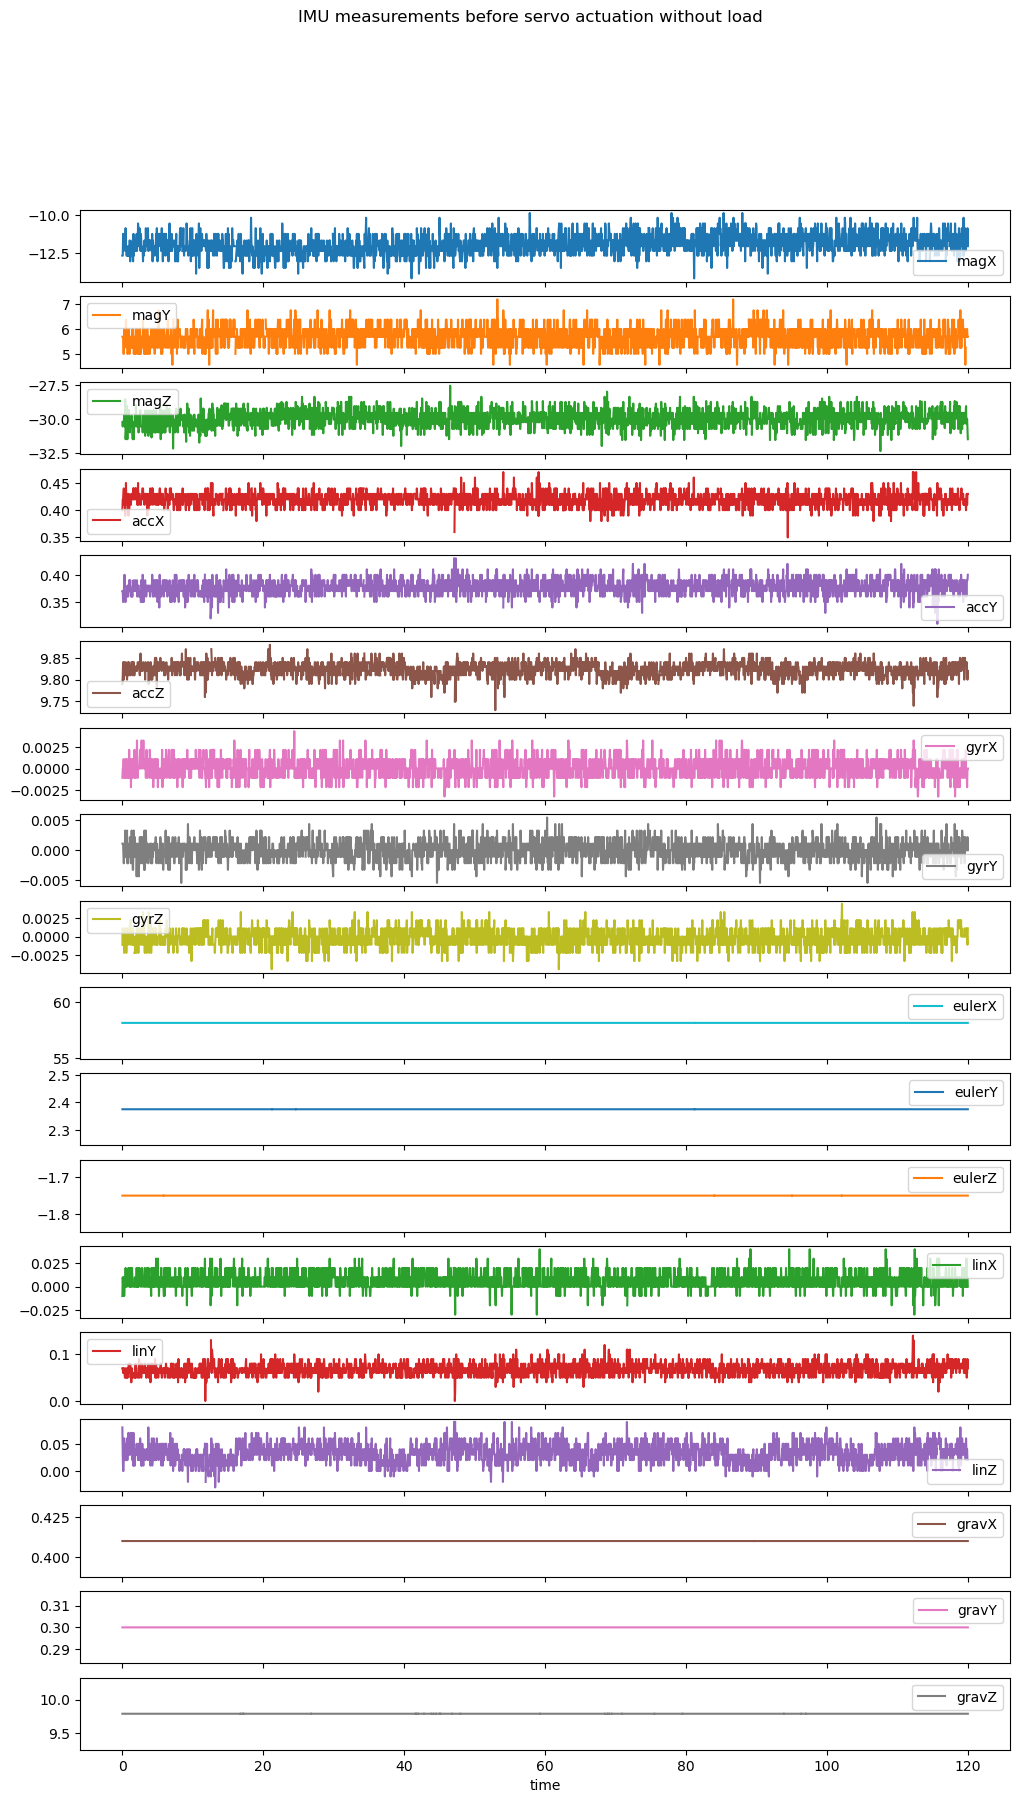

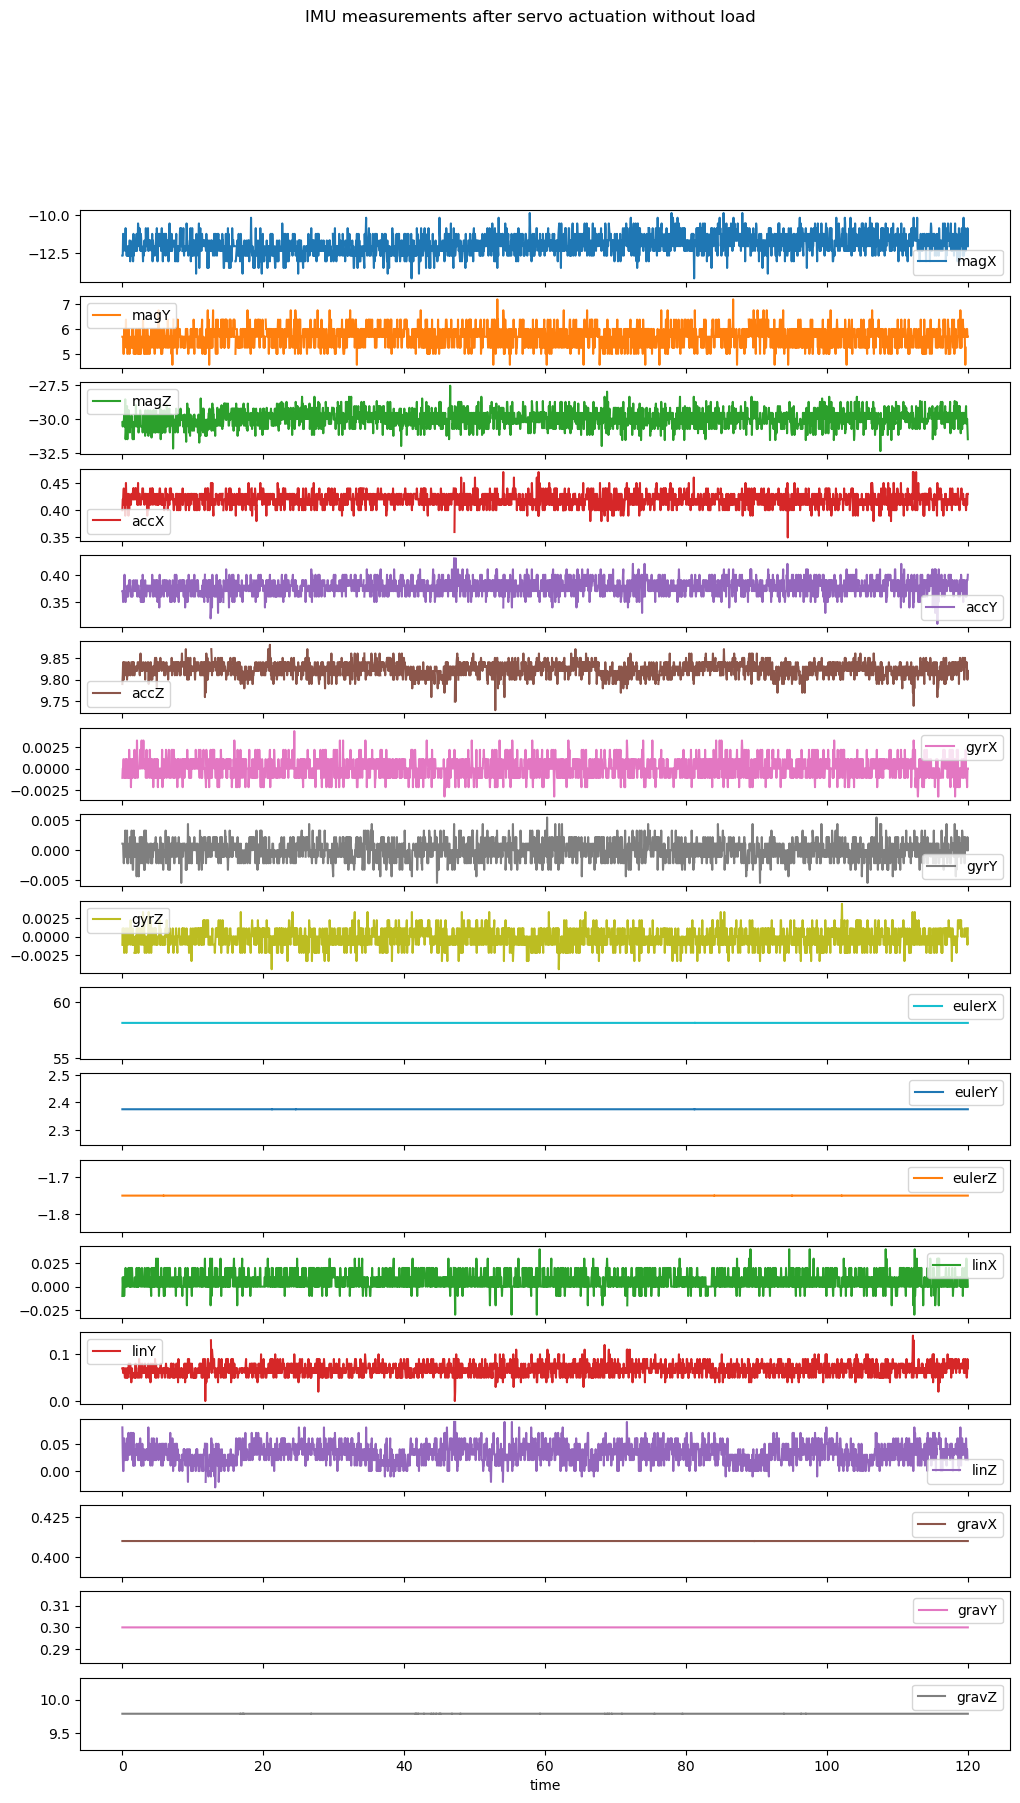

In [3]:
print("statistics of IMU measurements before servo actuation without load")
up.displayStatistics(df_IMU)
df_IMU.set_index('time').plot(subplots=True, figsize=(12,20), title="IMU measurements before servo actuation without load")

print("statistics of IMU measurements after servo actuation without load")
up.displayStatistics(df_IMU2)
df_IMU2.set_index('time').plot(subplots=True, figsize=(12,20), title="IMU measurements after servo actuation without load")

### Plotting the distribution of the pure IMU measurments
First it plots the IMU before, then the IMU after

Distribution of IMU measurements before servo actuation without load
Distribution of IMU measurements after servo actuation without load


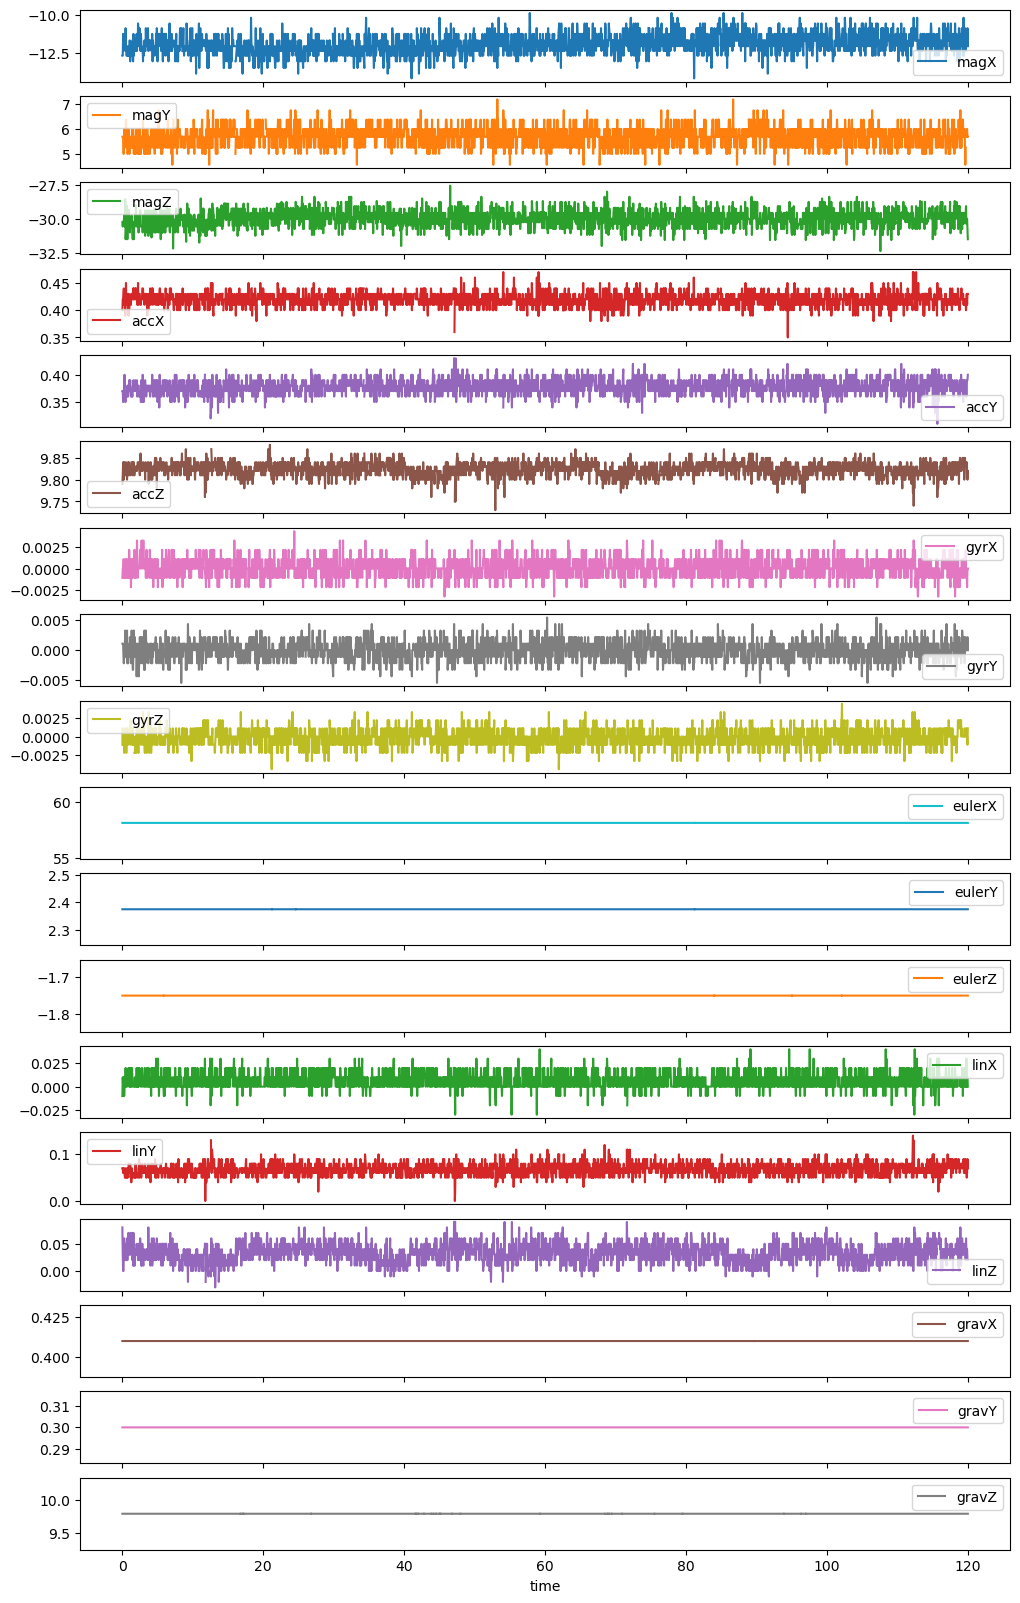

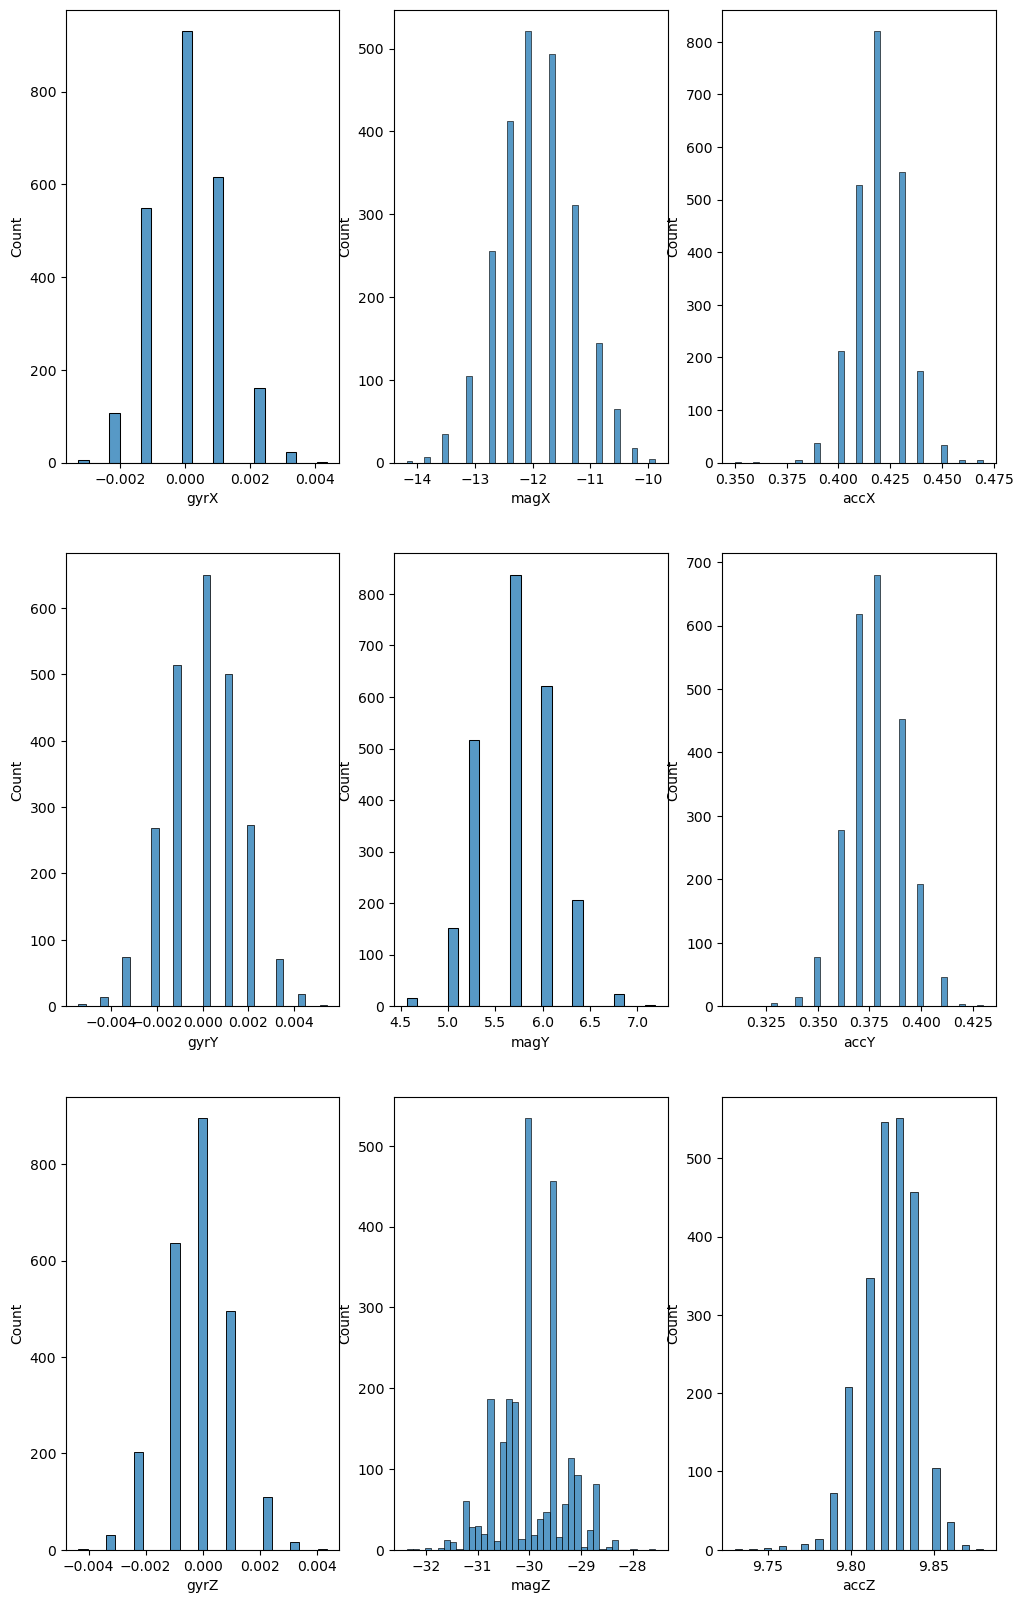

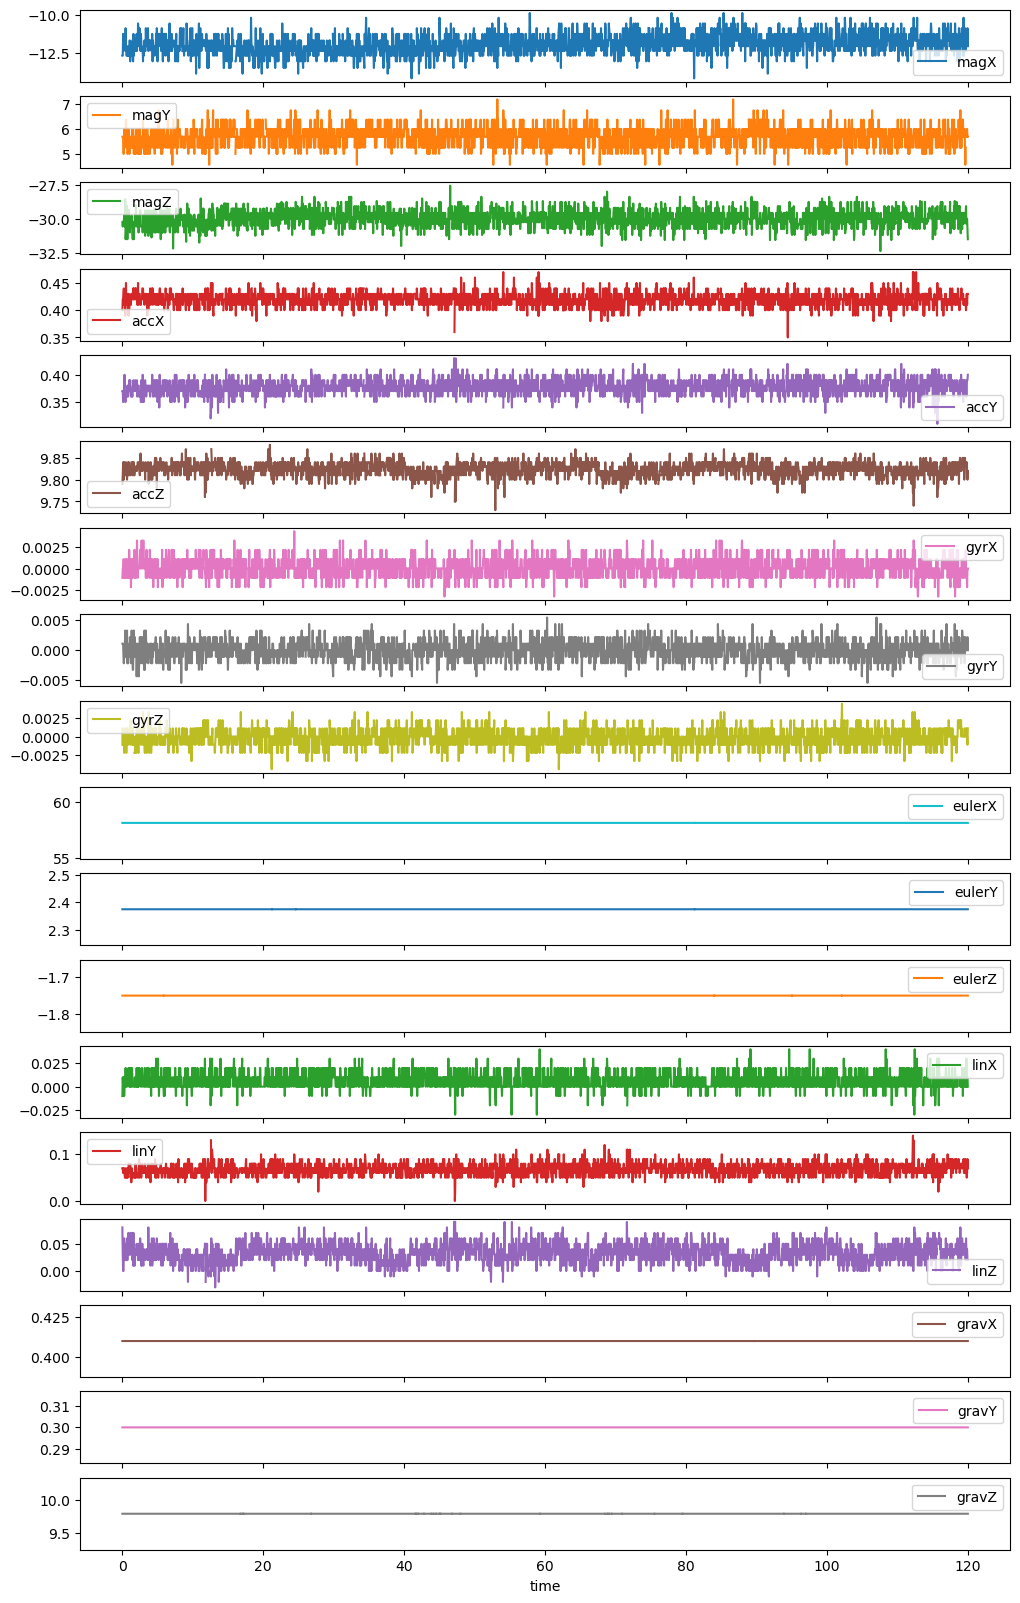

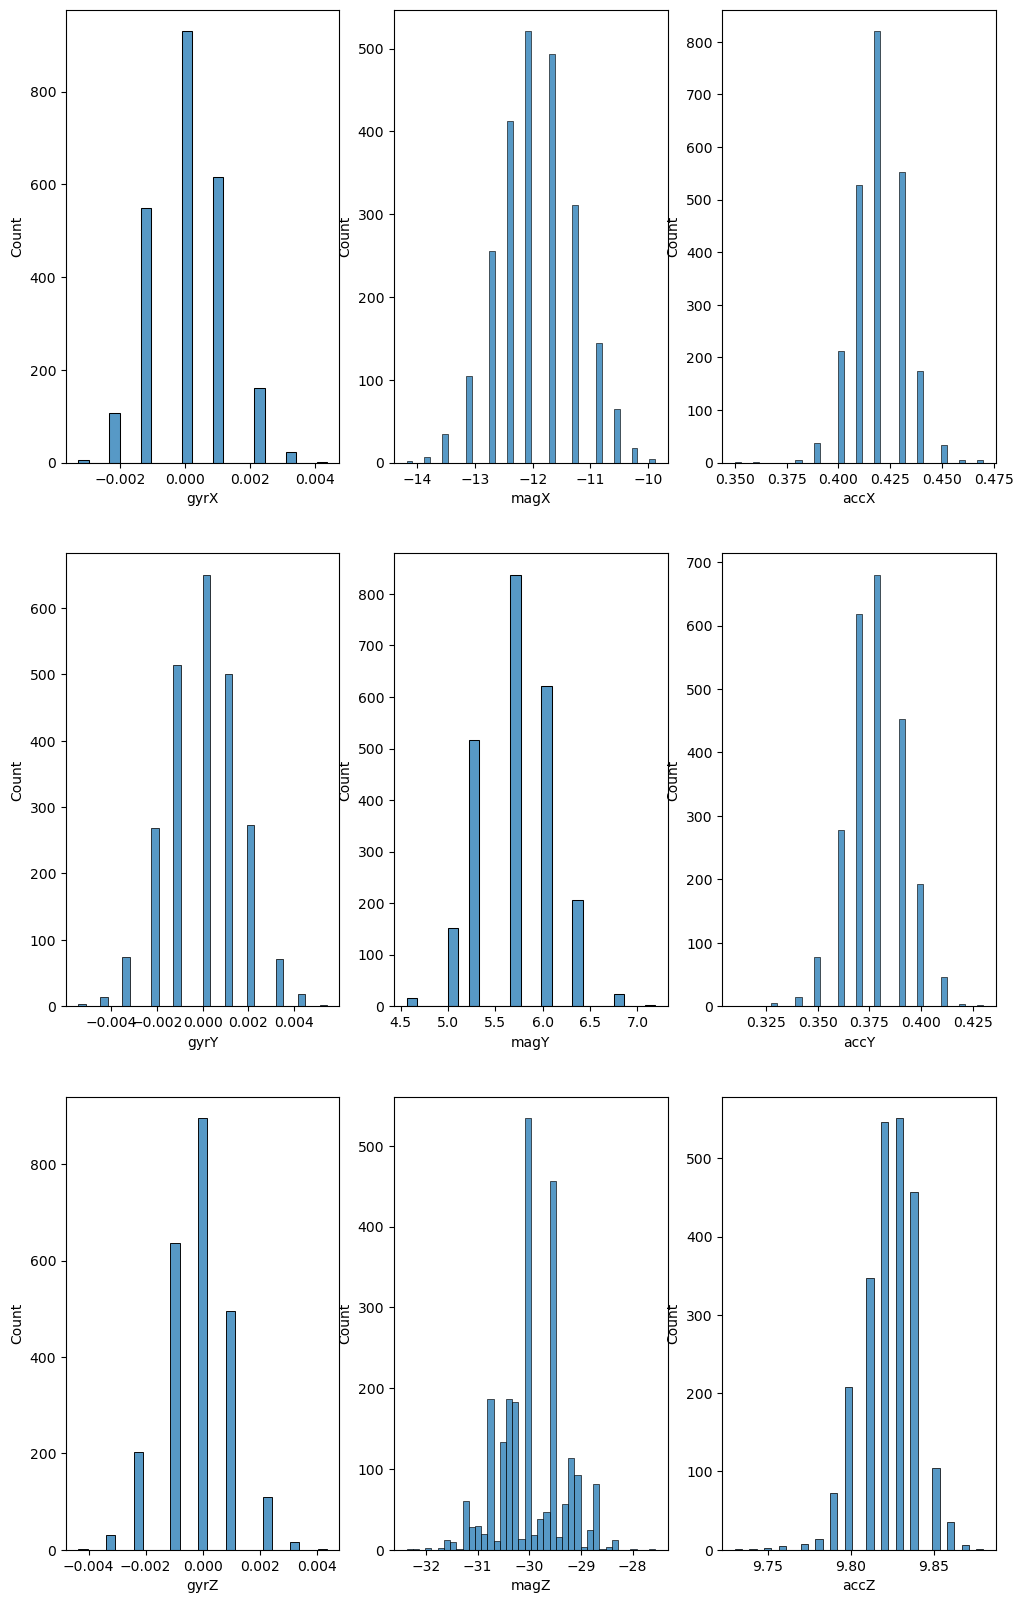

In [4]:
print("Distribution of IMU measurements before servo actuation without load")
up.plotIMU(df_IMU)

print("Distribution of IMU measurements after servo actuation without load")
up.plotIMU(df_IMU2)


## Comparing the IMU measurements before and after the servo was actuated to see if there is a permanent change in the magnetometer measurements

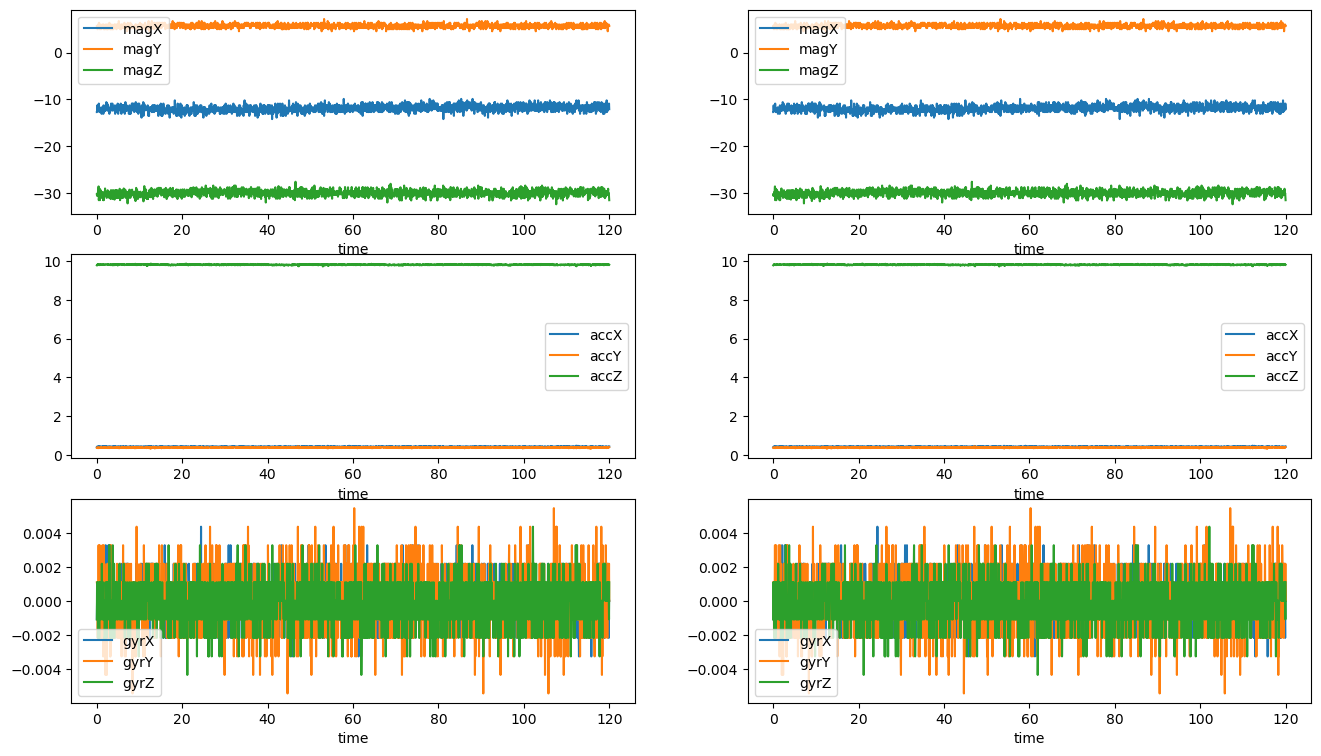

In [5]:
up.compareIMUMeasurements(df_IMU, df_IMU2)

## IMU measurements while the servo motor actuates
Here, the outliers has been removed using aspen unscrambler

Test statistics of IMU measurments during servo actuation wihtout load, outliers removed
        mean     std   skew  kurtosis
magX  59.993  66.435  0.353    -1.451
magY  -4.661  59.799 -0.098    -1.260
magZ -34.866   4.311 -0.353    -1.300
accX   0.420   0.014  0.139     1.270
accY   0.380   0.014 -0.062    -0.019
accZ   9.824   0.017 -0.599     1.721
gyrX   0.000   0.001 -0.024     0.448
gyrY   0.000   0.002  0.089    -0.152
gyrZ  -0.000   0.001  0.193     0.298


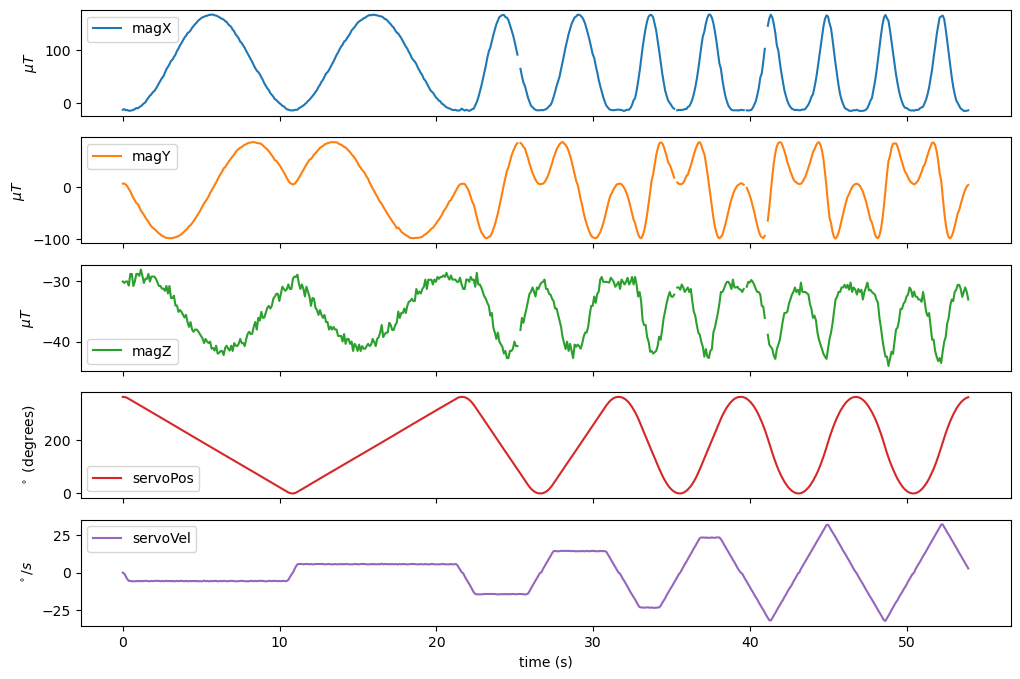

In [6]:
print("Test statistics of IMU measurments during servo actuation wihtout load, outliers removed")
up.displayStatistics(df_servo_a, filename="figuresAndResults//servoWithoutLoadTestStatistics.csv",)



axs = df_servo_a[['time', 'magX', 'magY', 'magZ', 'servoPos', 'servoVel']].set_index('time').plot(subplots=True, figsize=(12,8))
axs[0].set_ylabel(r'$\mu T$')
axs[1].set_ylabel(r'$\mu T$')
axs[2].set_ylabel(r'$\mu T$')
axs[3].set_ylabel(r'$^\circ$ (degrees)')
axs[4].set_ylabel(r'$^\circ/s$')
axs[4].set_xlabel('time (s)')
plt.show()

### Pairplot of IMU and servo motor measurements during servo motor actuation

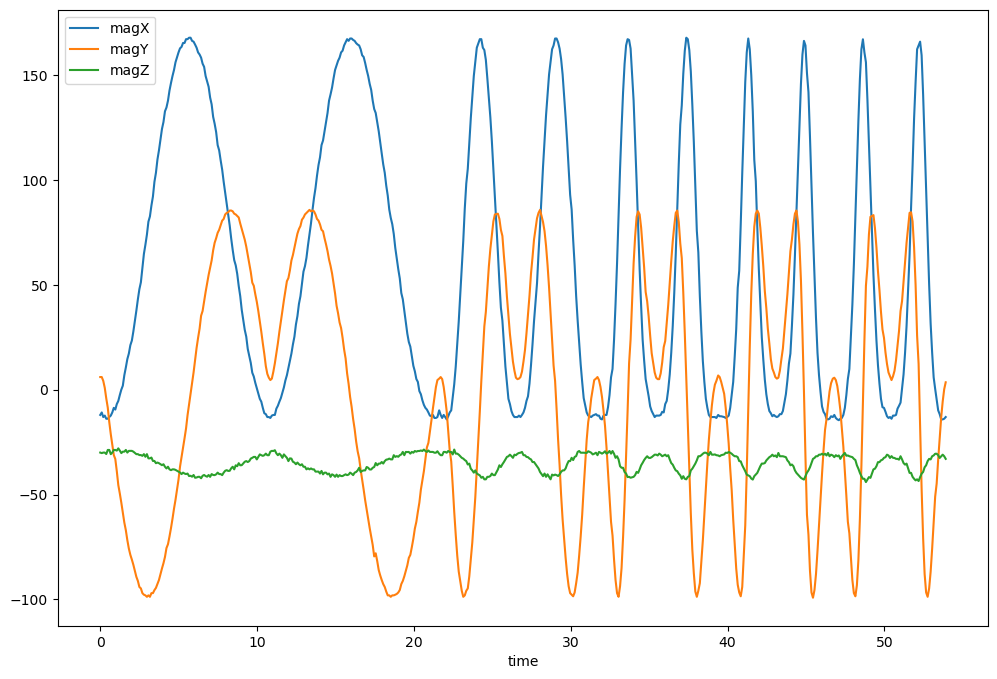

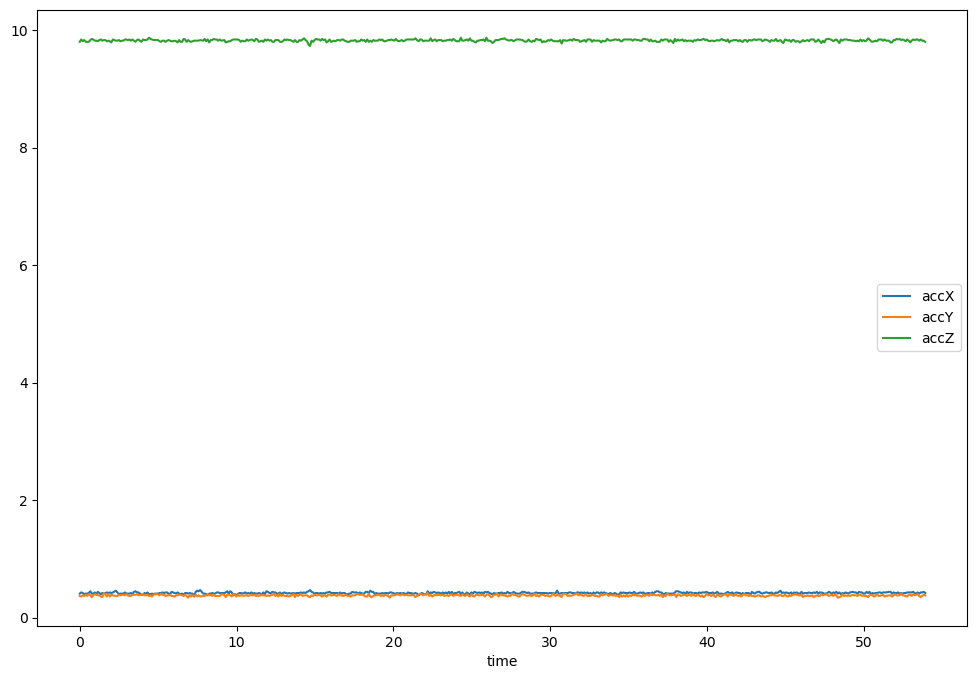

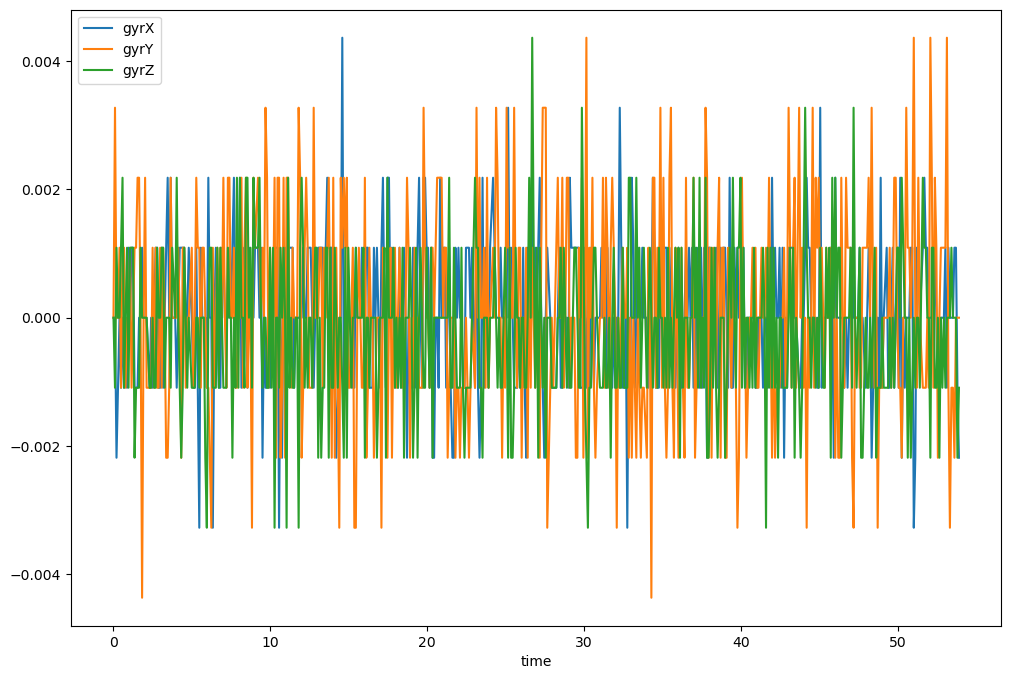

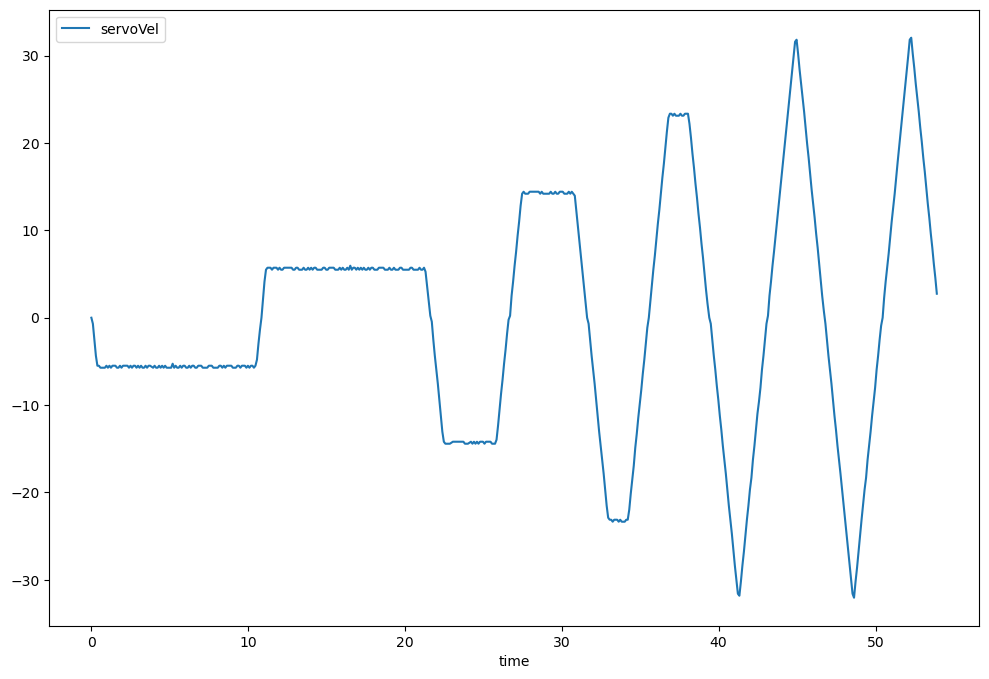

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


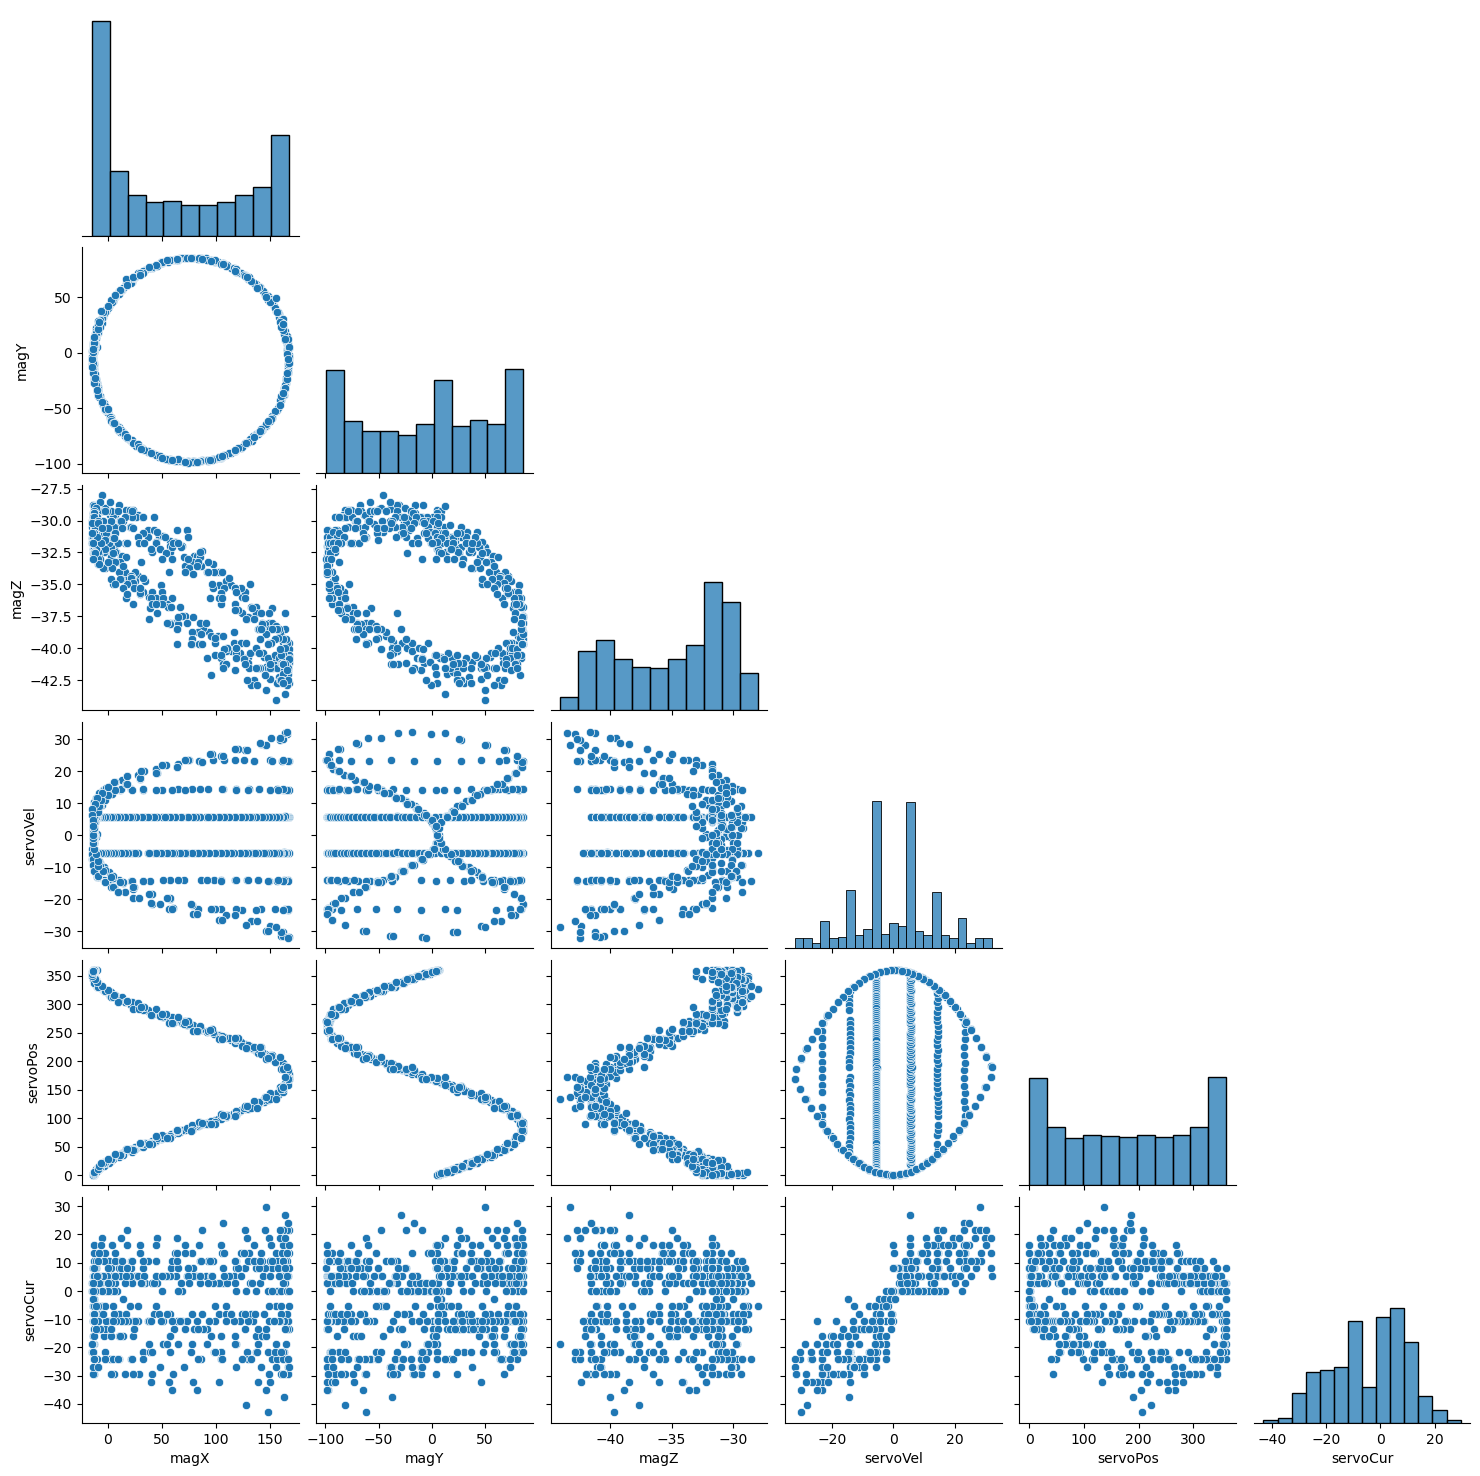

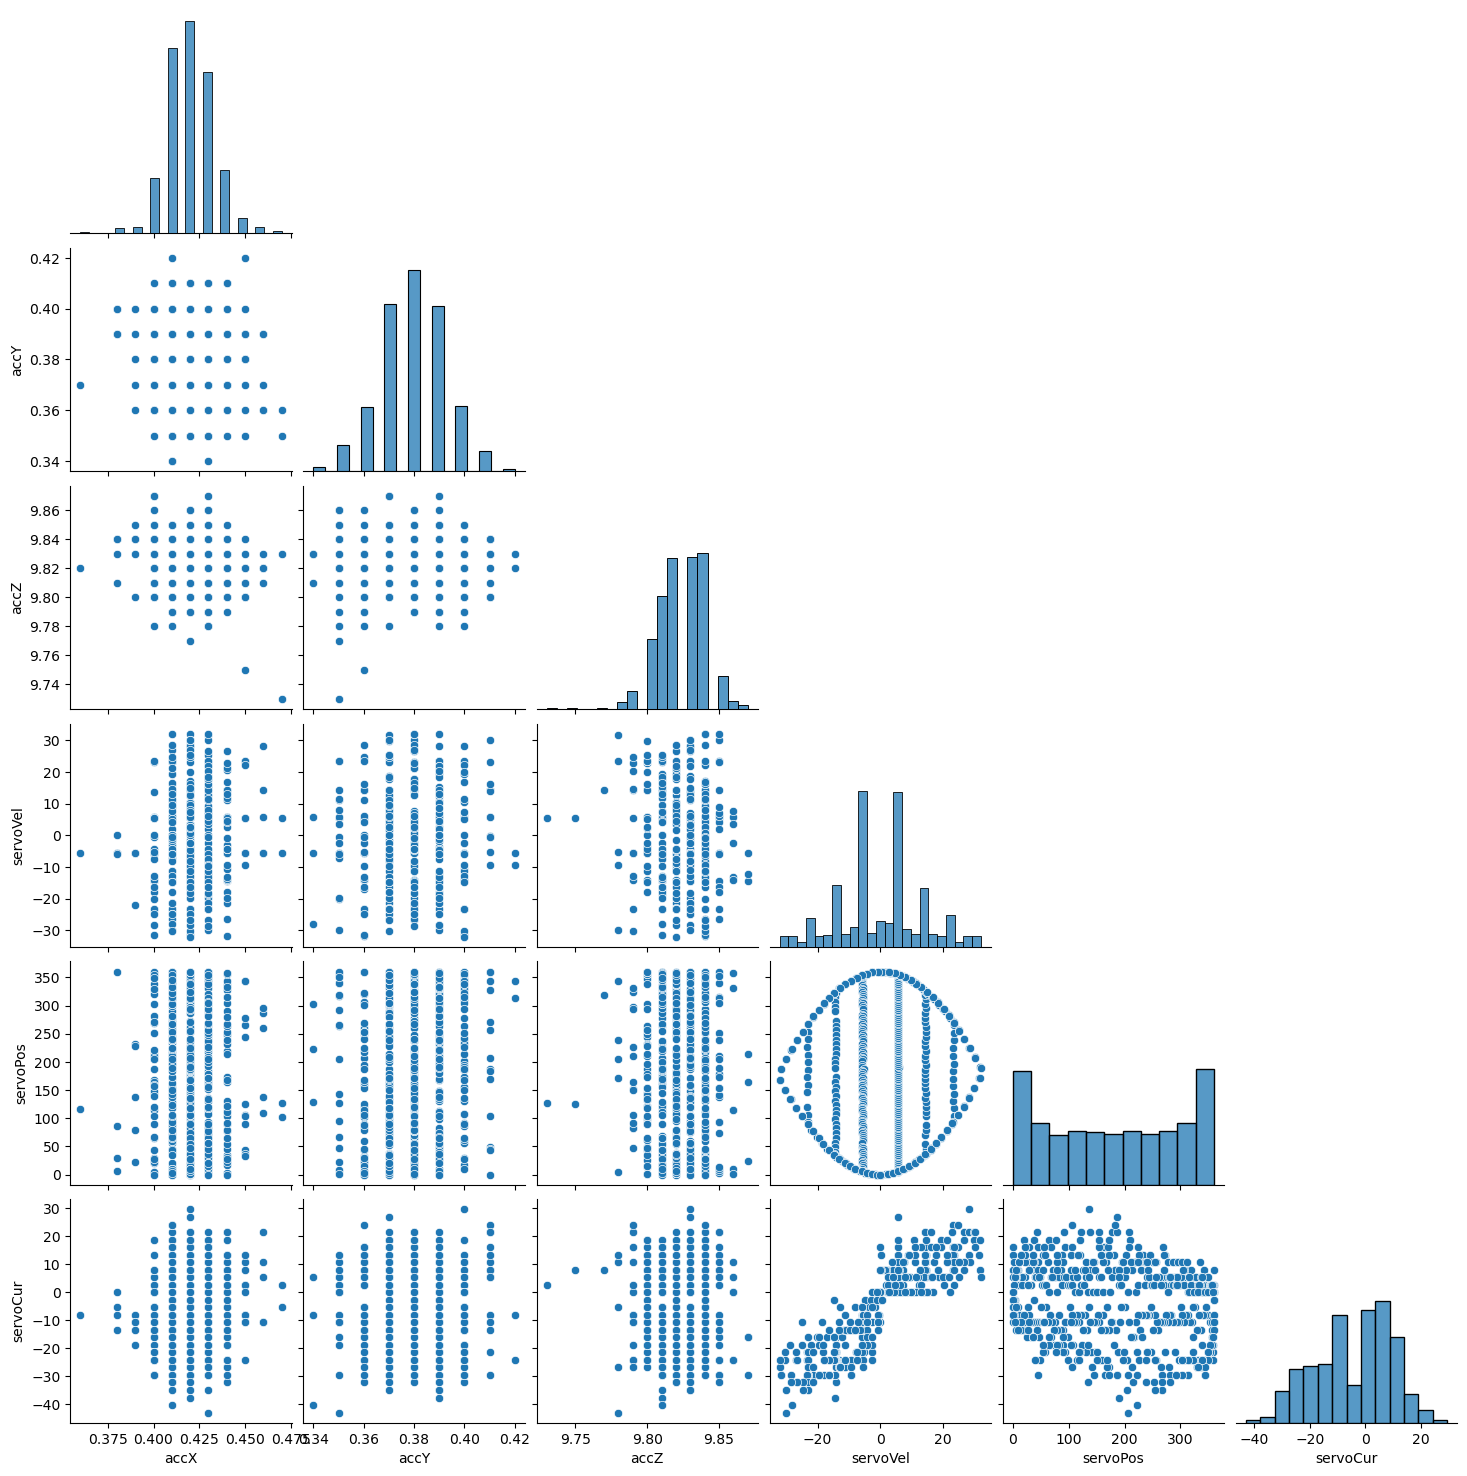

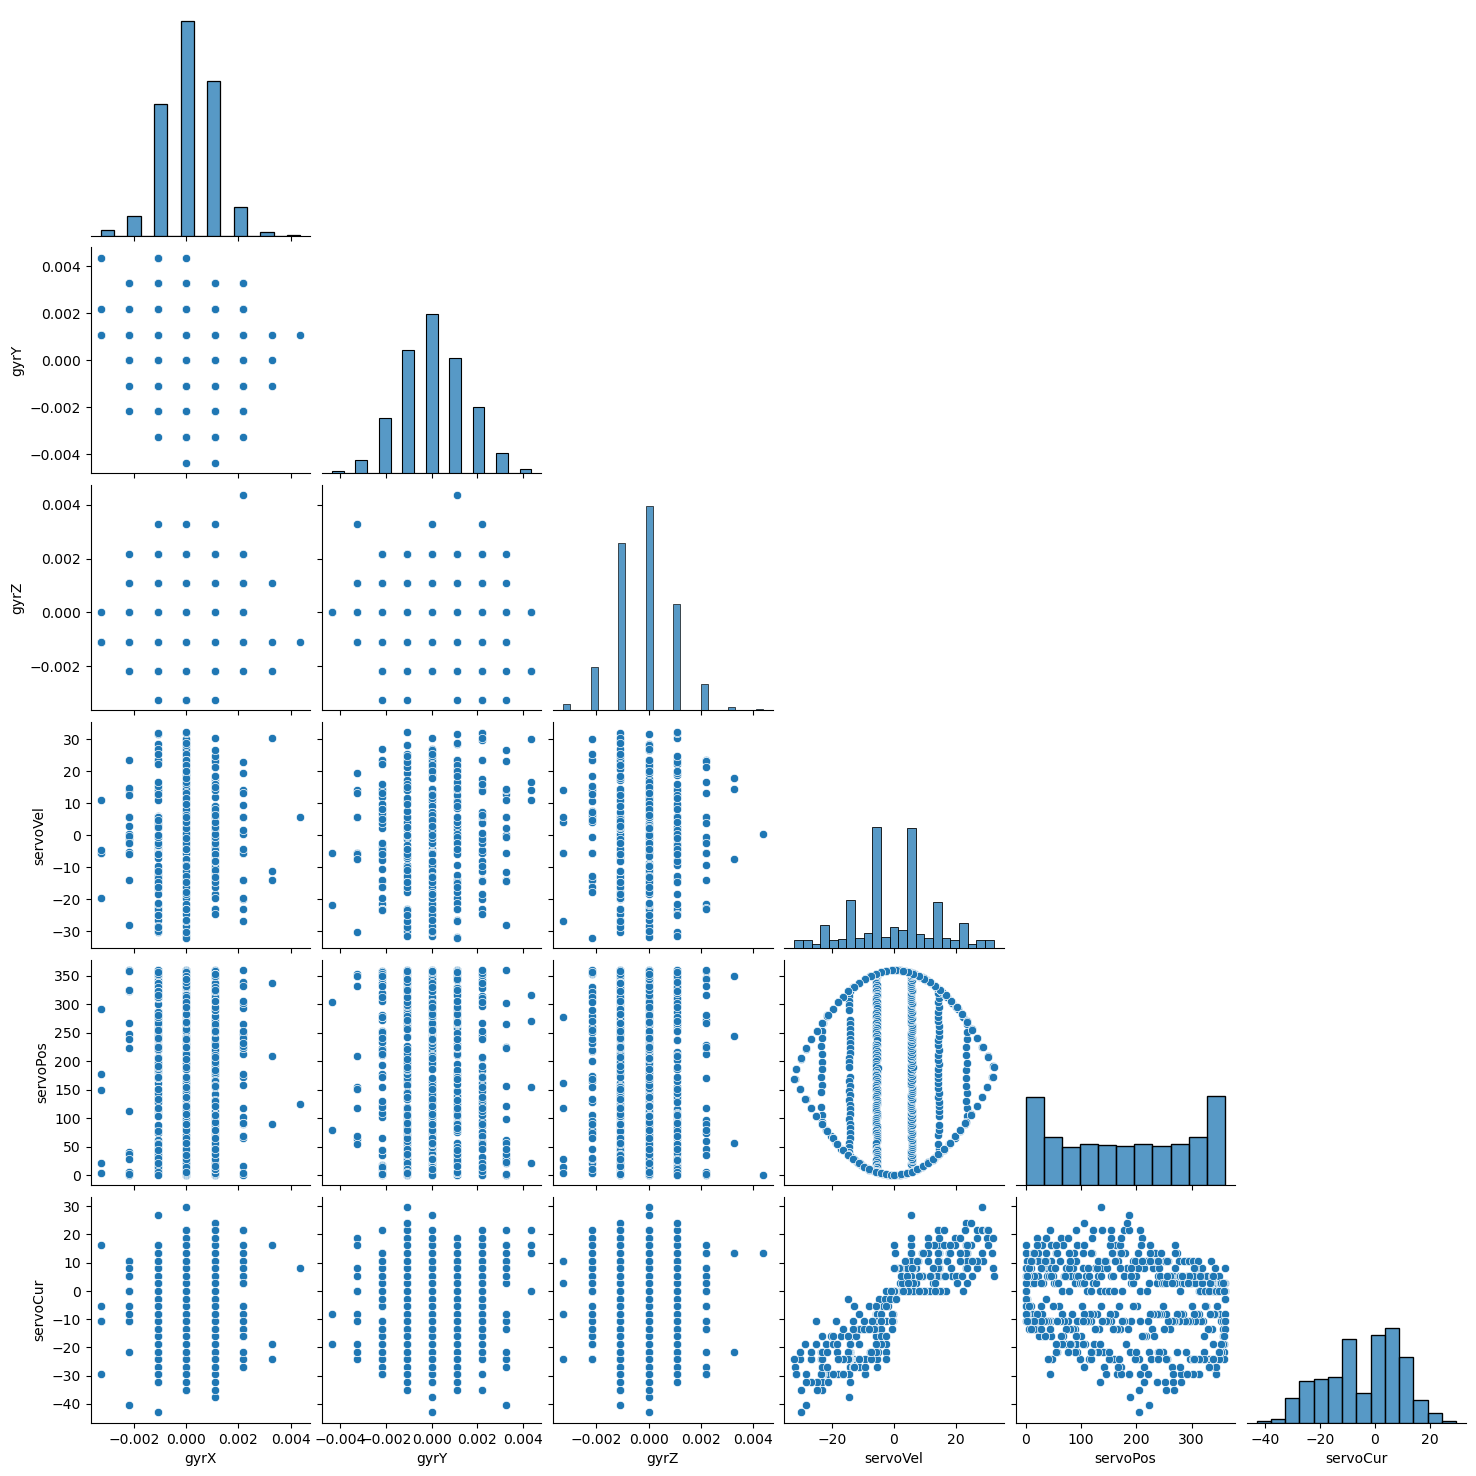

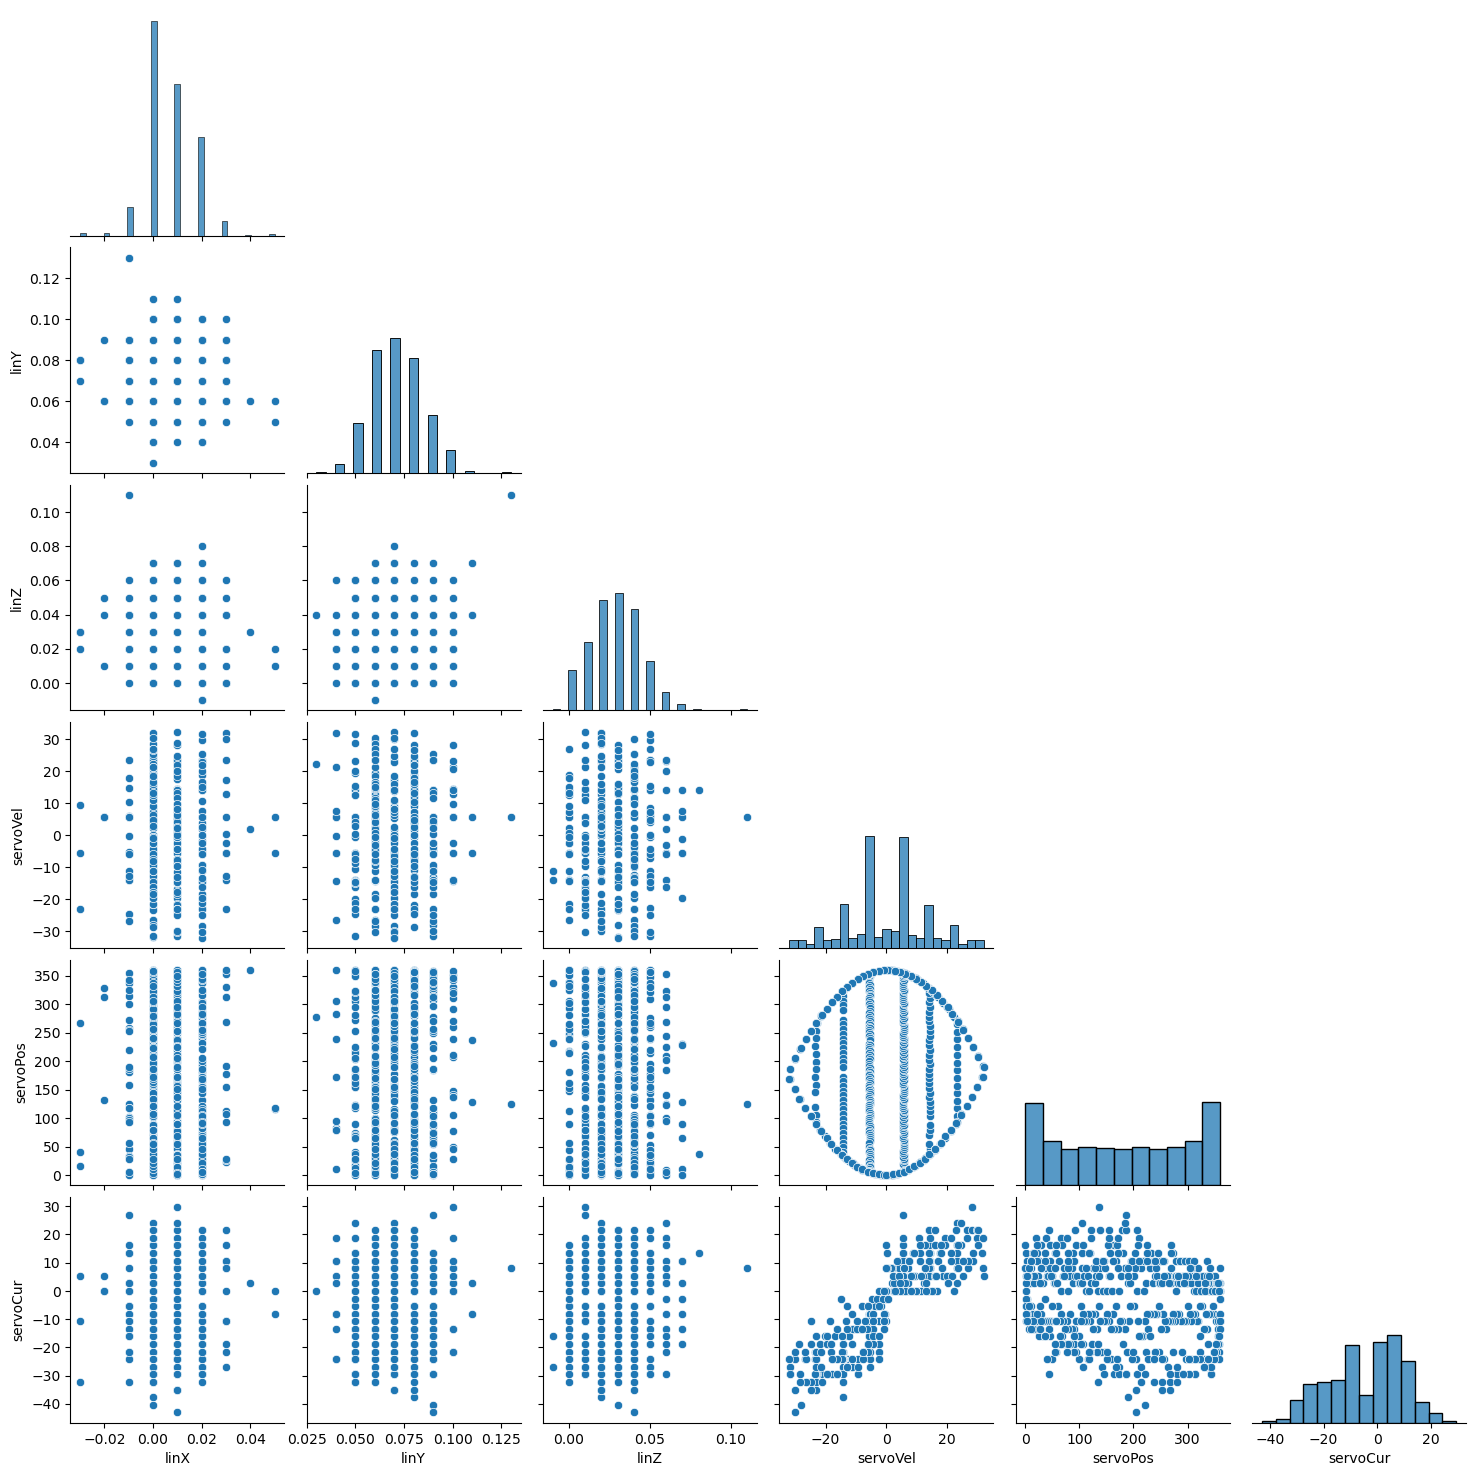

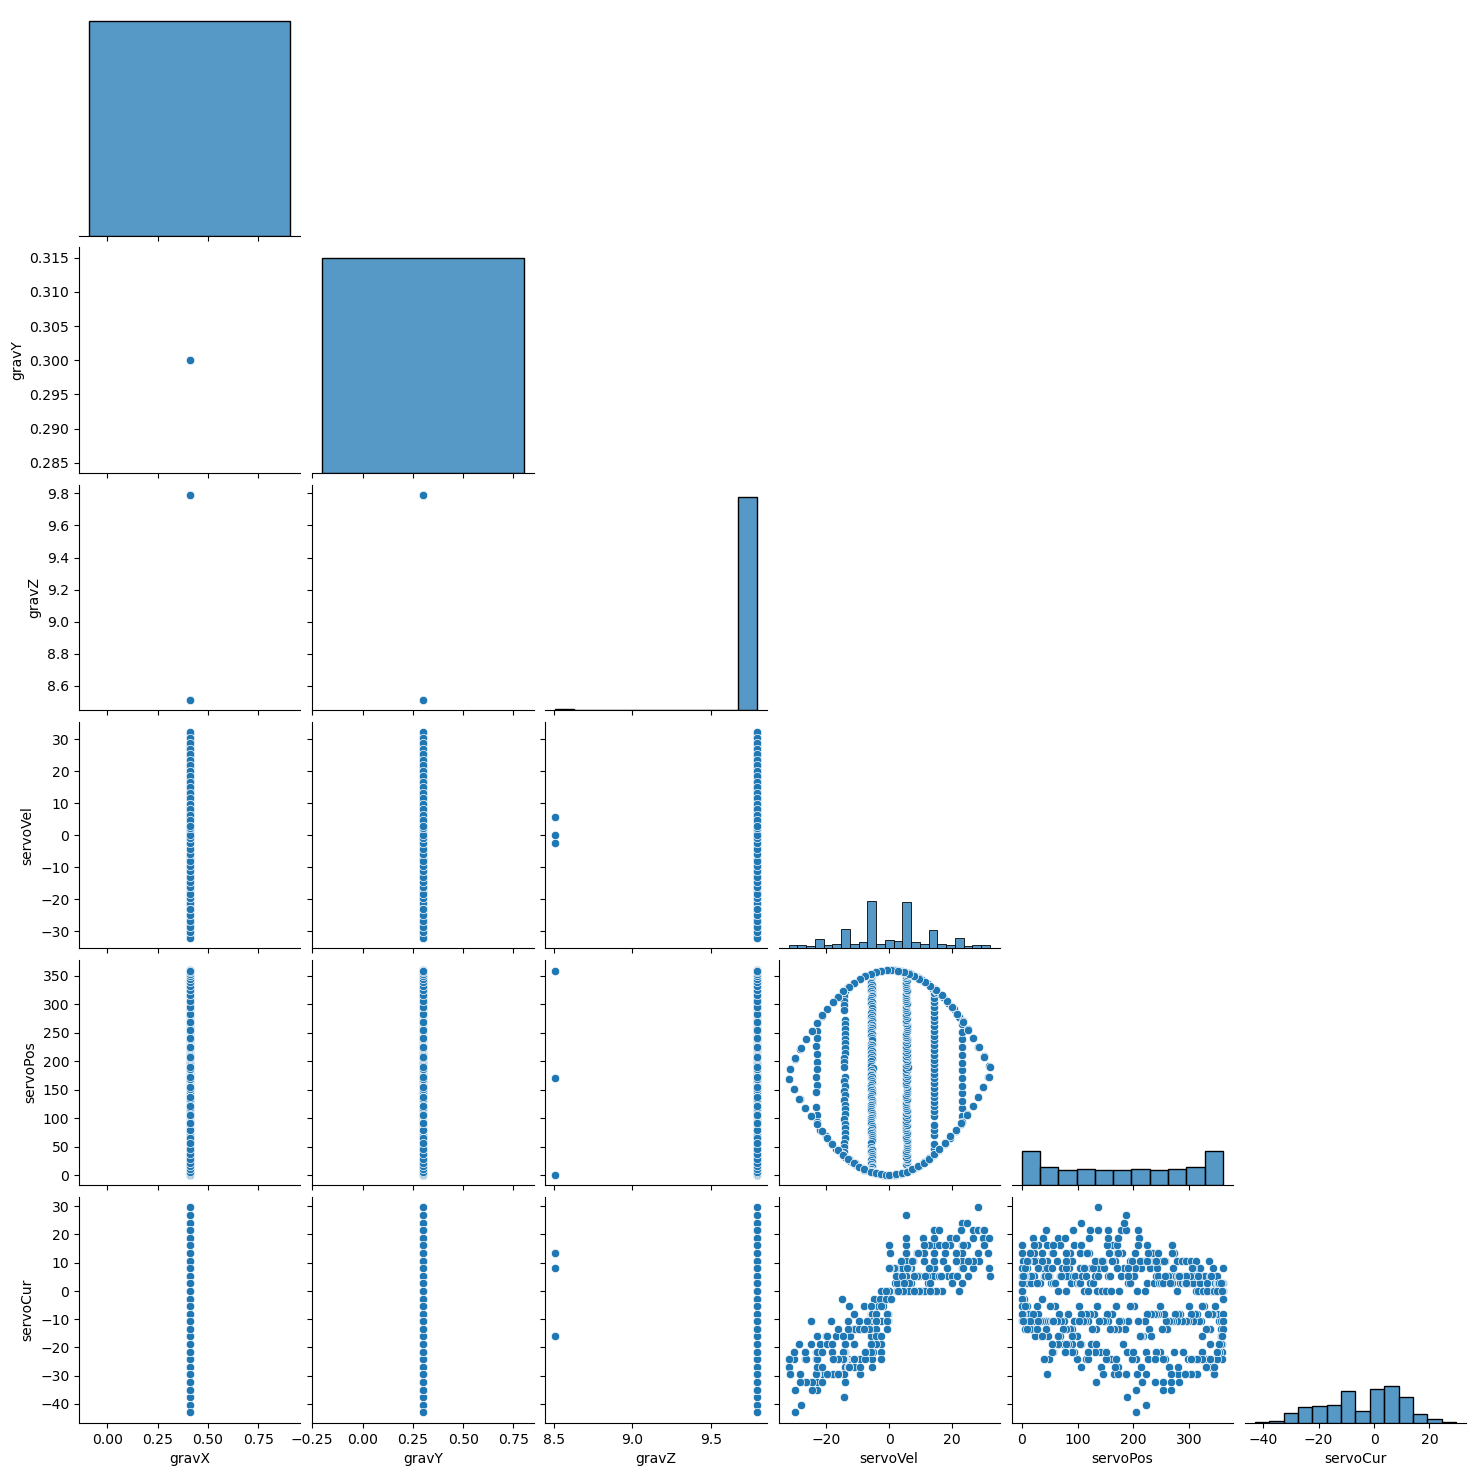

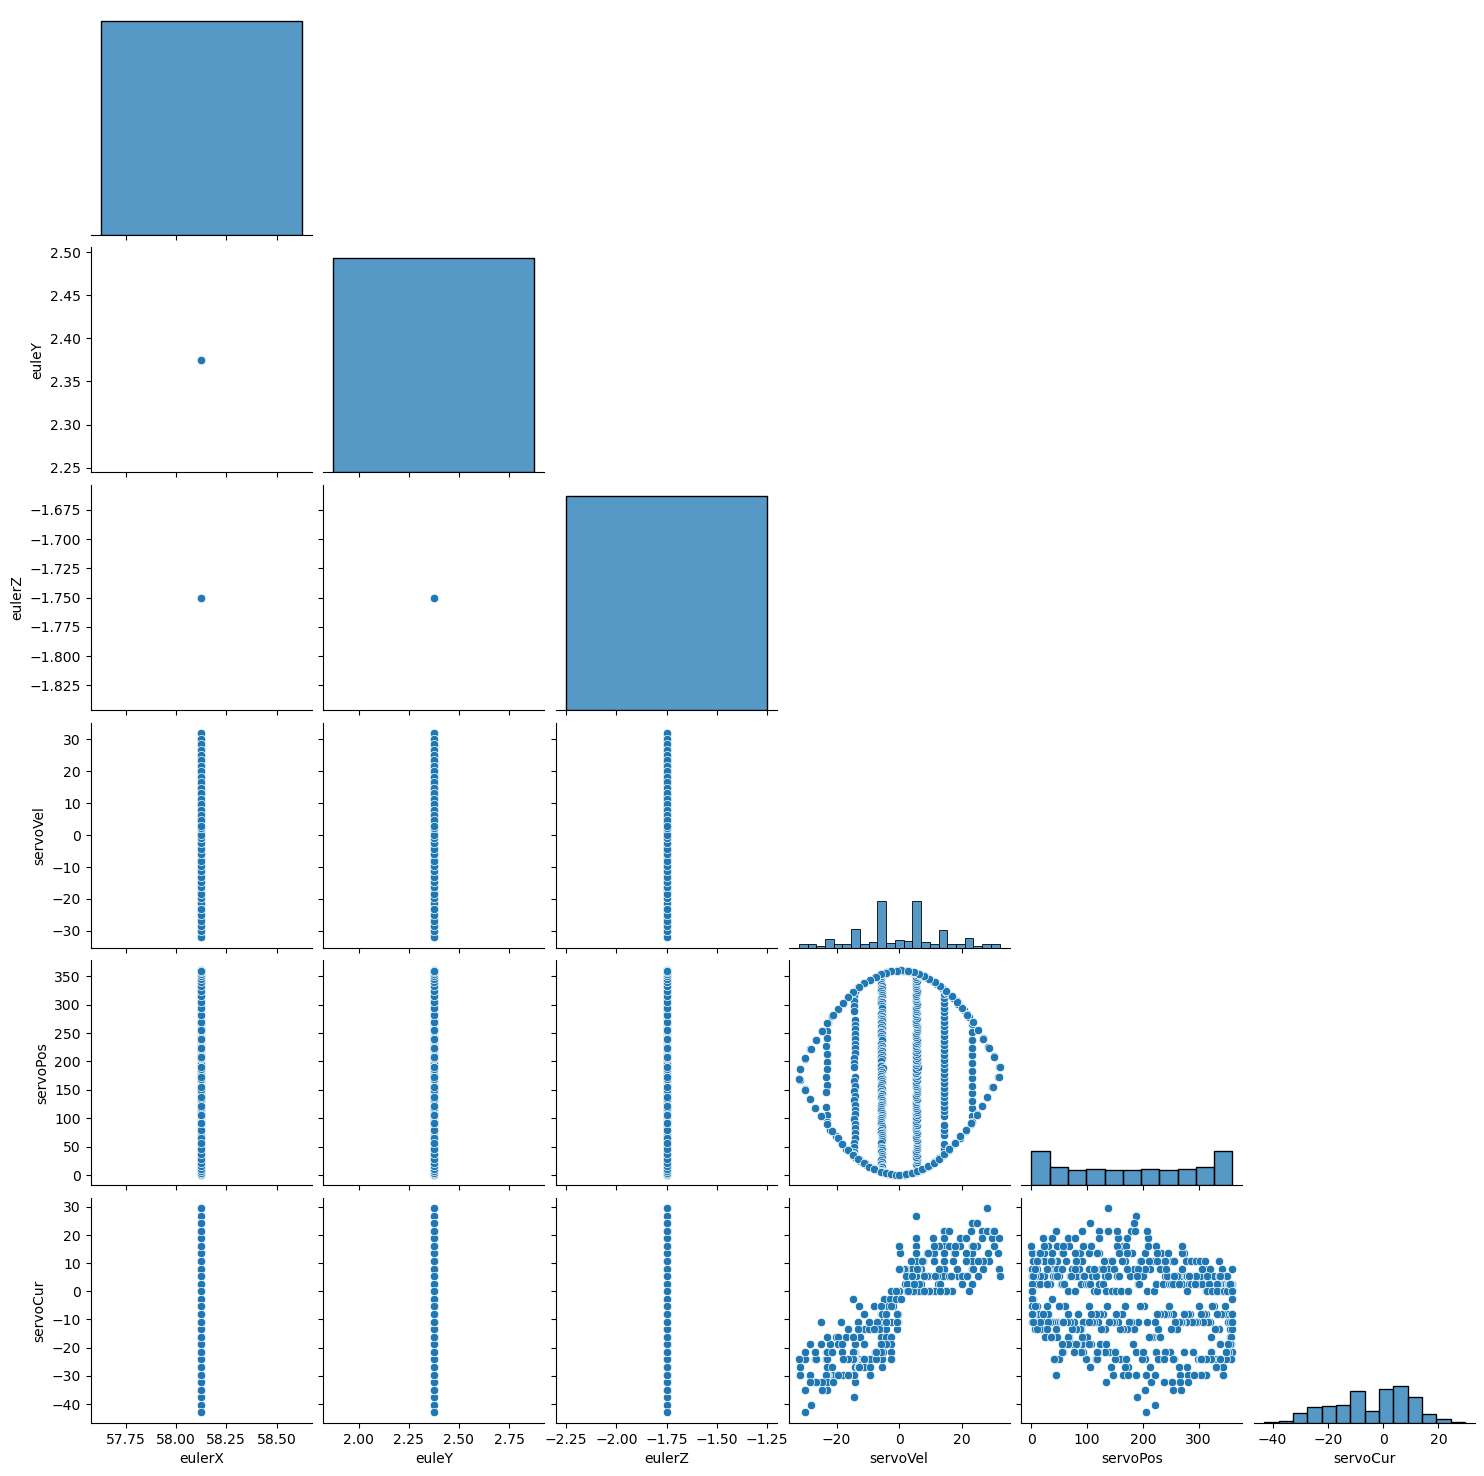

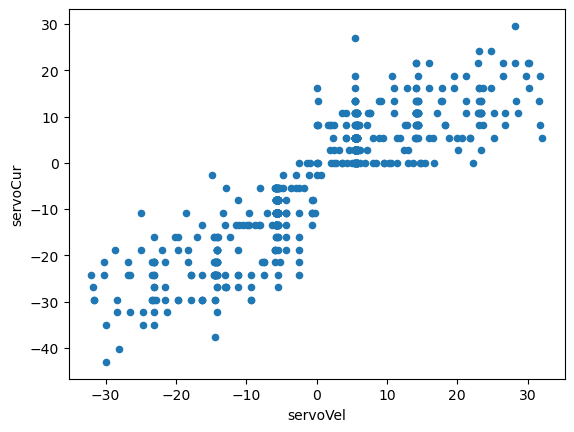

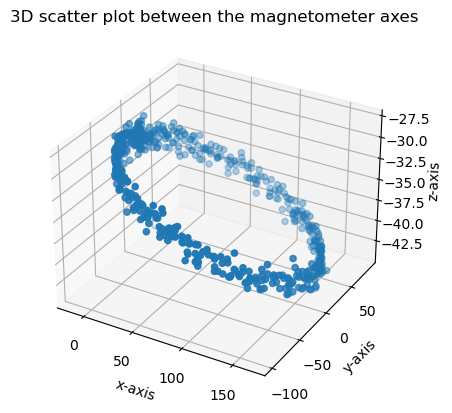

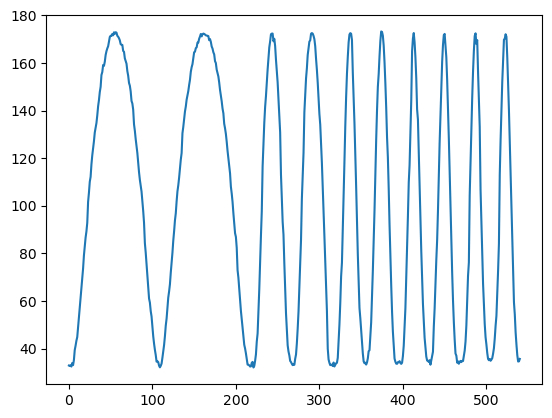

In [8]:
up.plotServo(df_servo_a, directory='../projectThesisTest1/newCurrentMeas/woLoad')

df_servo_a.plot.scatter(x = 'servoVel', y = 'servoCur')
 
fig = plt.figure()
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# plotting
ax.scatter(df_servo_a['magX'], df_servo_a['magY'], df_servo_a['magZ'], 'green')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_title('3D scatter plot between the magnetometer axes')
plt.savefig("3dplot.svg")
plt.show()

df_servo_a = df_servo_a.dropna()
abs = np.linalg.norm(df_servo_a[['magX', 'magY', 'magZ']].values,axis=1)

plt.plot(abs)

# Test with \**dark voise*\* Load Simulator 3000

statistics of IMU measurements before servo actuation with load
        mean    std   skew  kurtosis
magX -12.267  0.621 -0.080    -0.038
magY   8.417  0.454 -0.086    -0.138
magZ -27.718  0.597  0.030     0.053
accX   0.466  0.011  0.157    -0.506
accY   0.527  0.015  0.296     0.828
accZ   9.794  0.016 -0.231     0.180
gyrX   0.000  0.001  0.065     0.437
gyrY   0.000  0.002 -0.131    -0.045
gyrZ  -0.000  0.001  0.145     0.153
statistics of IMU measurements after servo actuation with load
        mean    std   skew  kurtosis
magX -12.267  0.621 -0.080    -0.038
magY   8.417  0.454 -0.086    -0.138
magZ -27.718  0.597  0.030     0.053
accX   0.466  0.011  0.157    -0.506
accY   0.527  0.015  0.296     0.828
accZ   9.794  0.016 -0.231     0.180
gyrX   0.000  0.001  0.065     0.437
gyrY   0.000  0.002 -0.131    -0.045
gyrZ  -0.000  0.001  0.145     0.153


array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>],
      dtype=object)

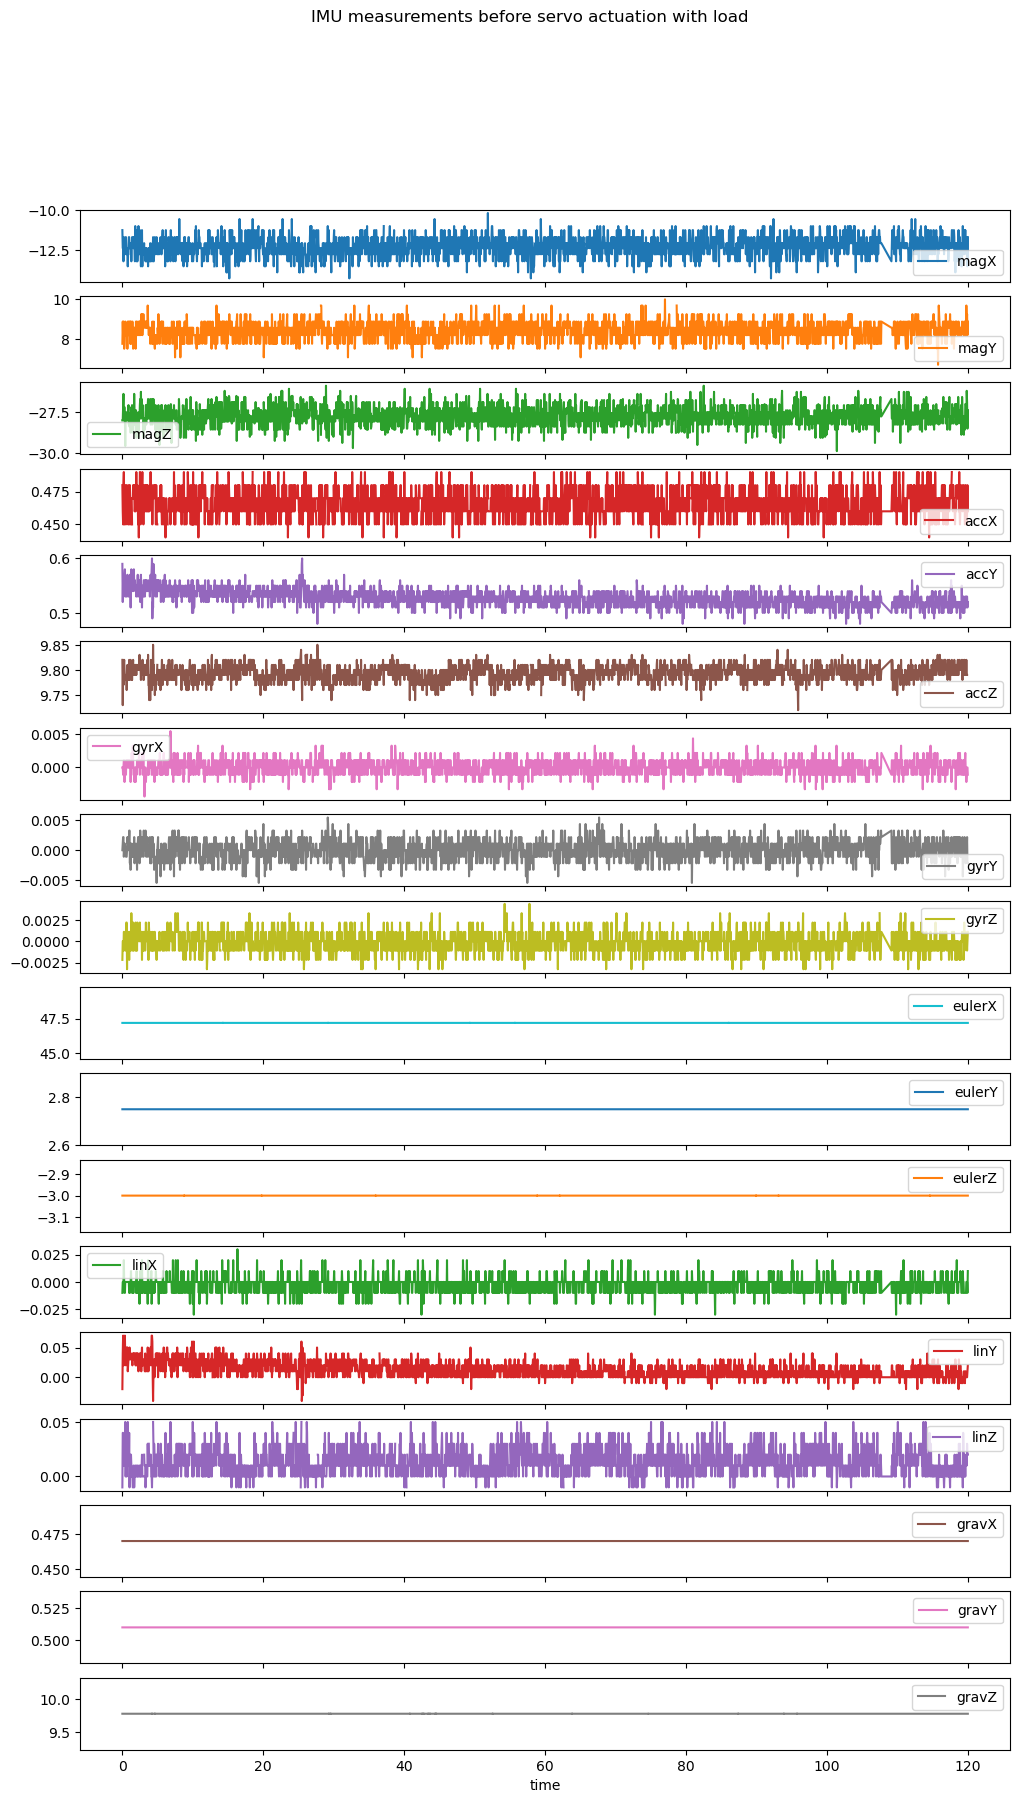

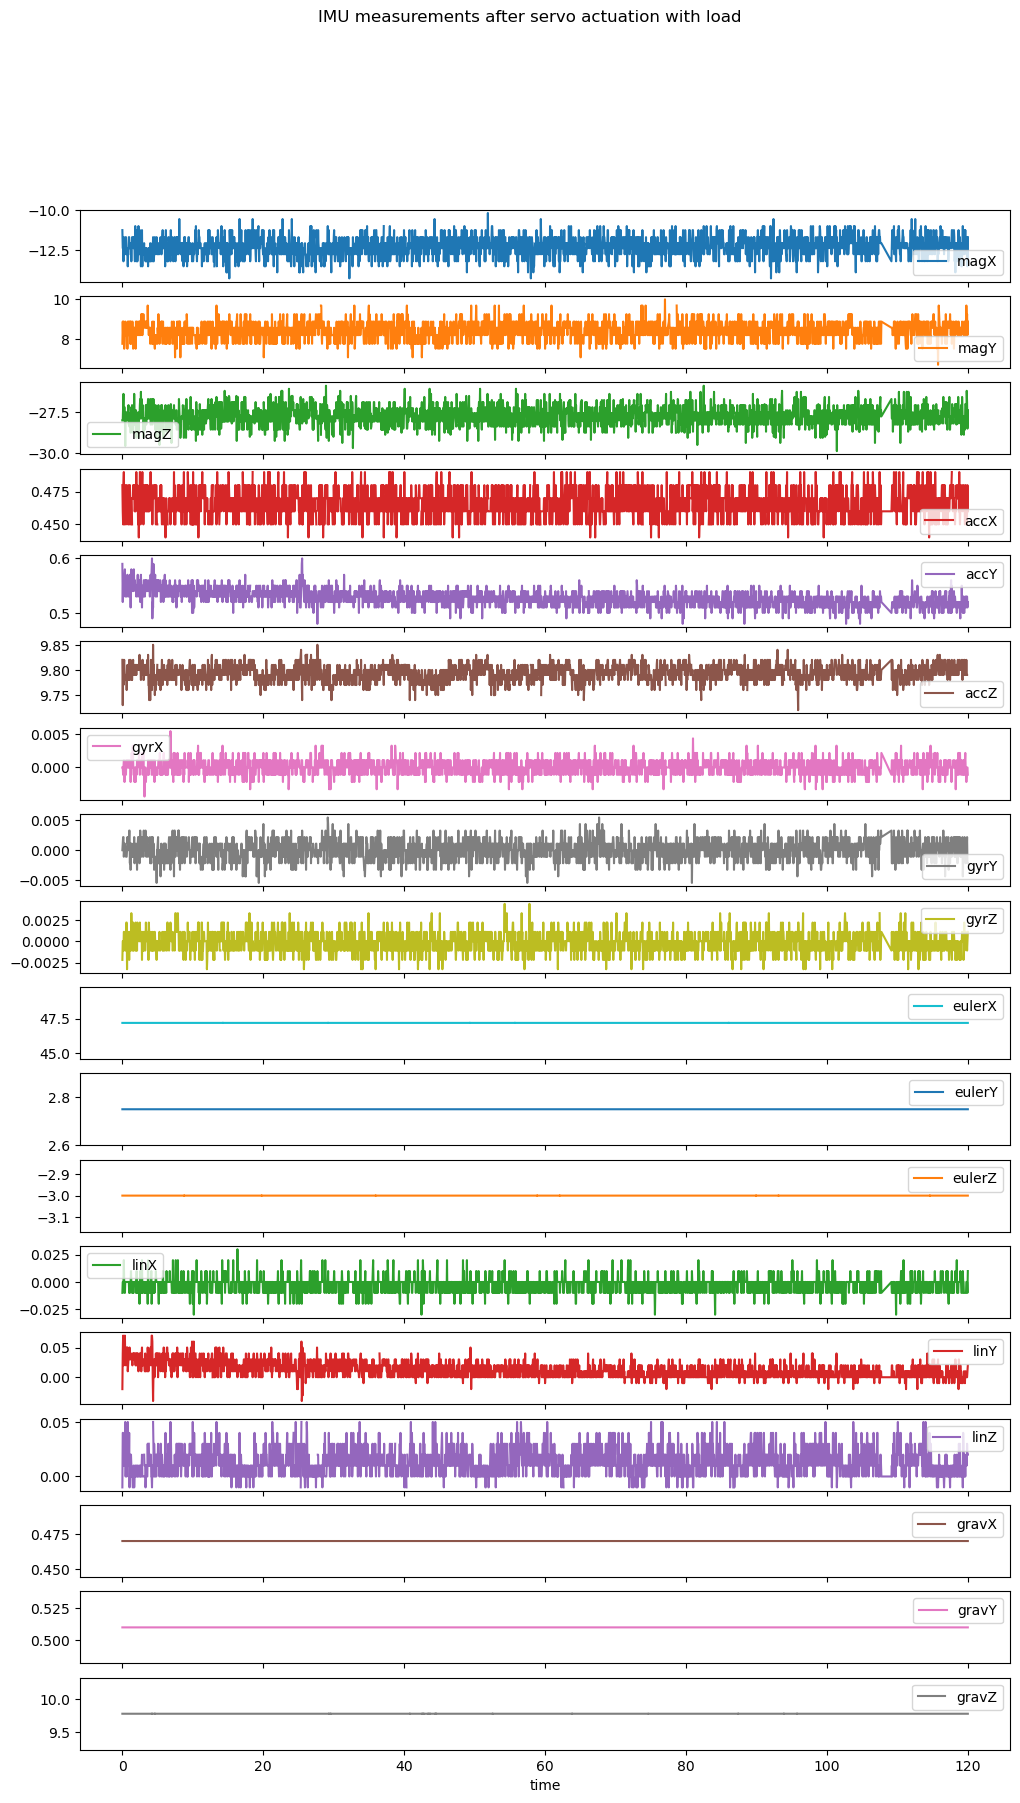

In [11]:

print("statistics of IMU measurements before servo actuation with load")
up.displayStatistics(df_IMU_L)
df_IMU_L.set_index('time').plot(subplots=True, figsize=(12,20), title="IMU measurements before servo actuation with load")

print("statistics of IMU measurements after servo actuation with load")
up.displayStatistics(df_IMU2_L)
df_IMU2_L.set_index('time').plot(subplots=True, figsize=(12,20), title="IMU measurements after servo actuation with load")

Distribution of IMU measurements before servo actuation without load
Distribution of IMU measurements after servo actuation without load


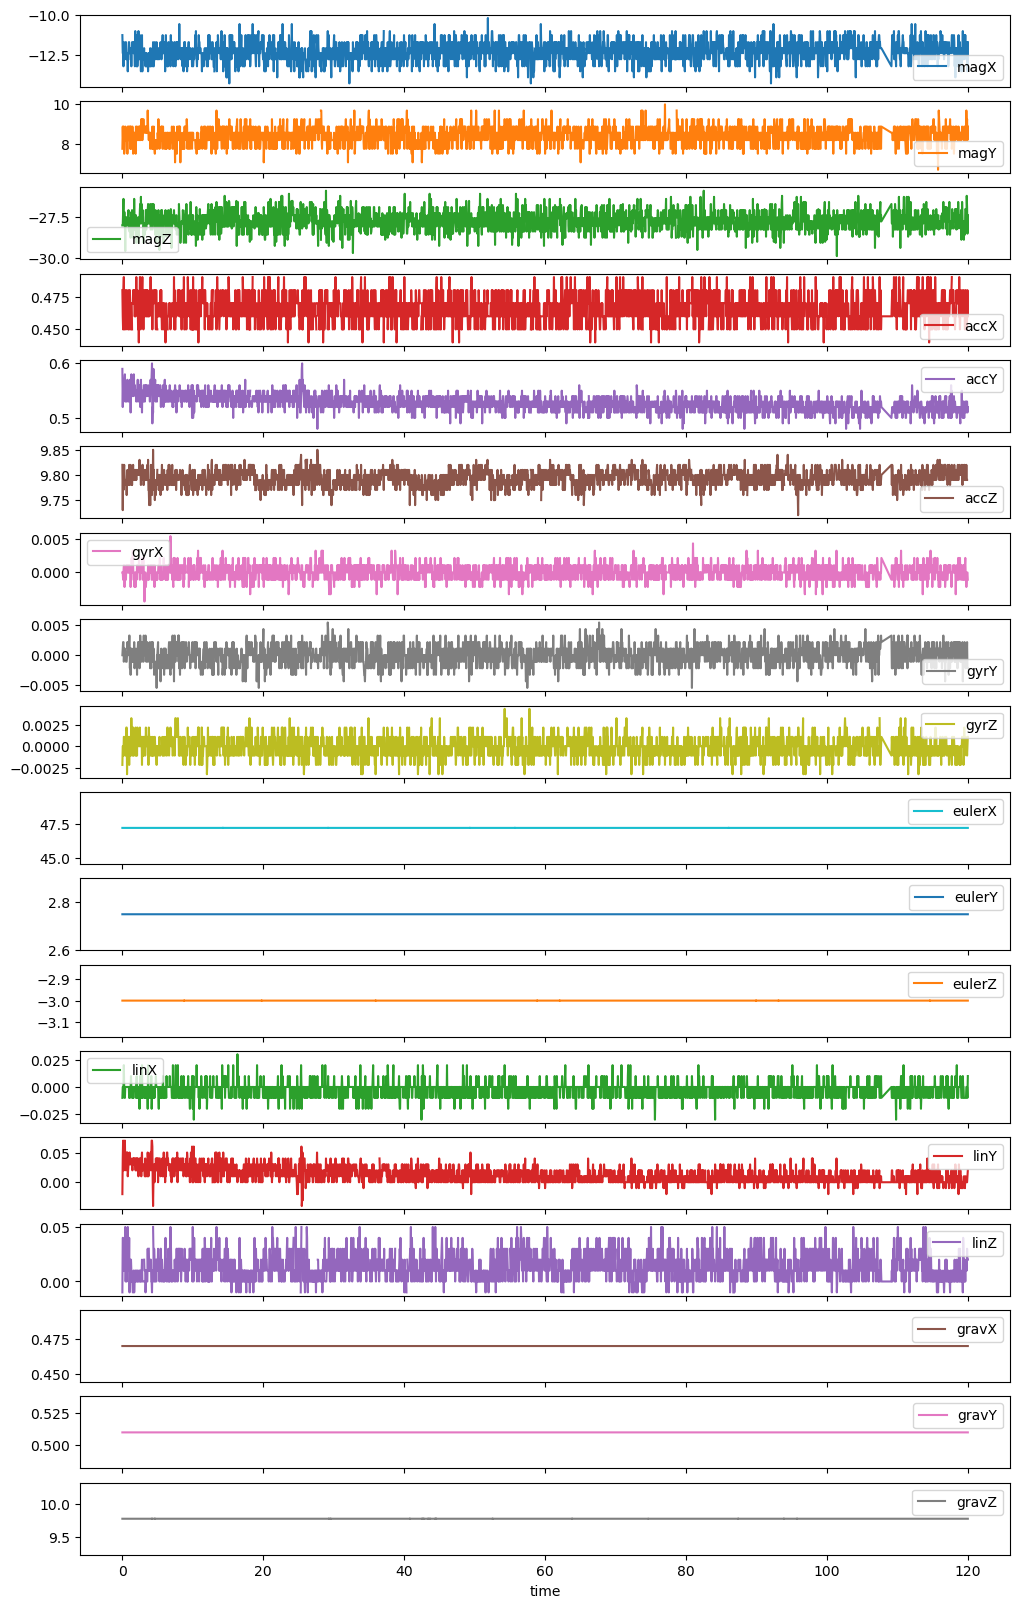

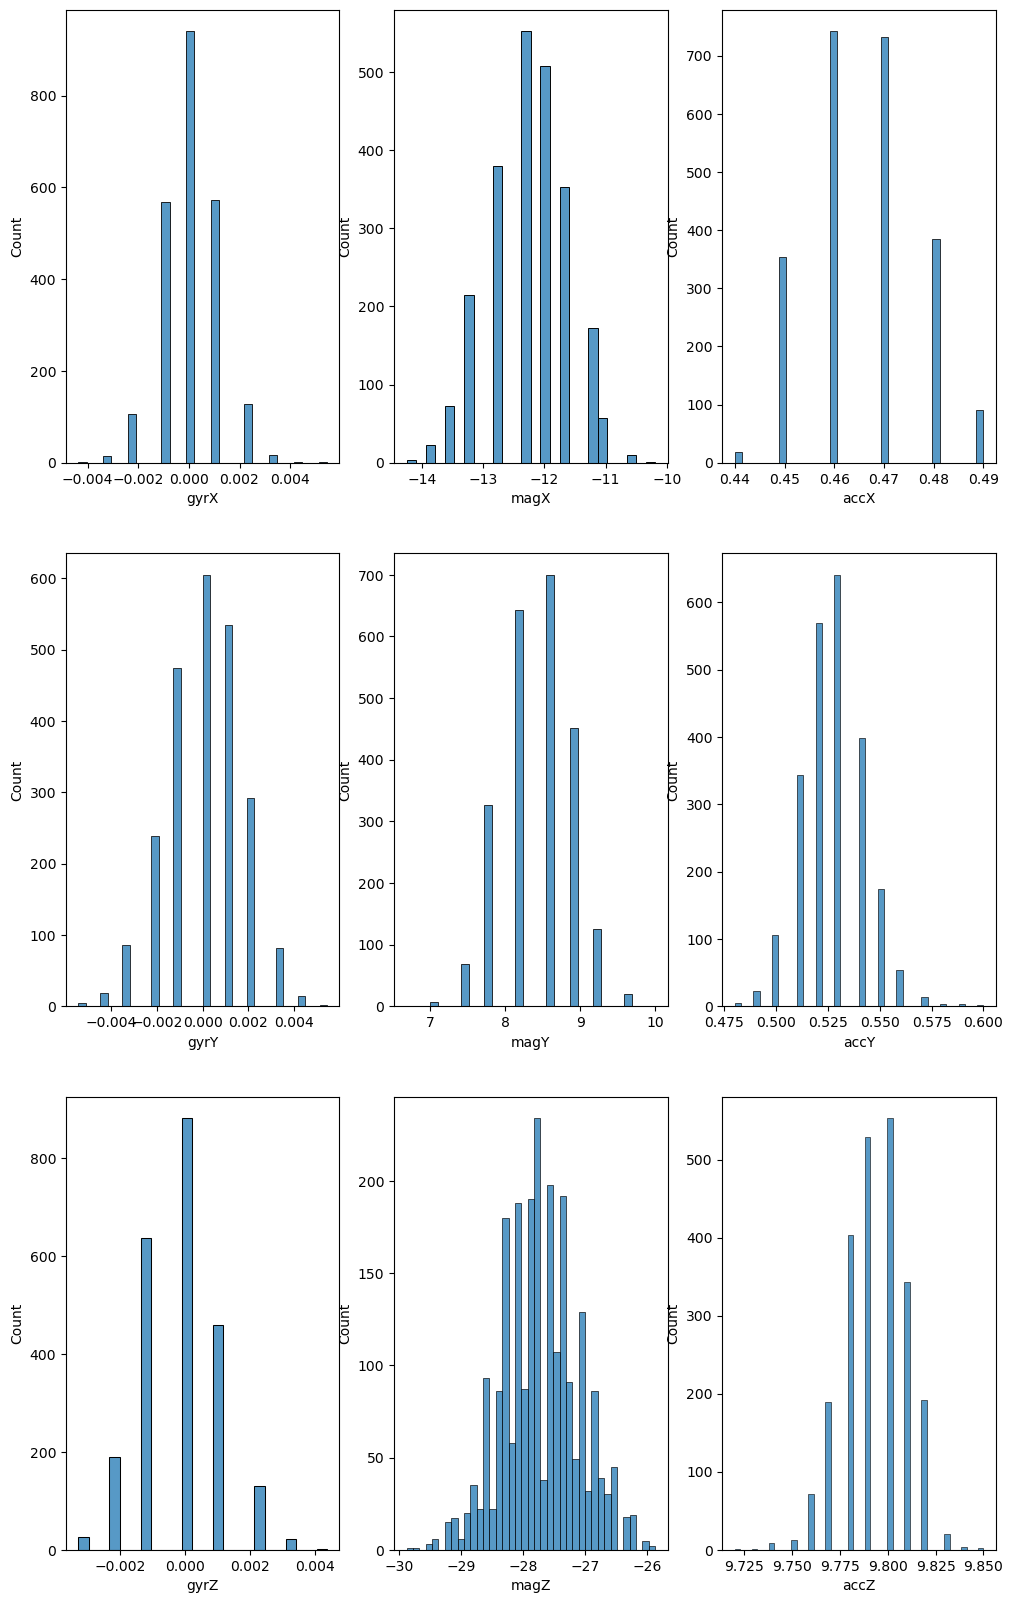

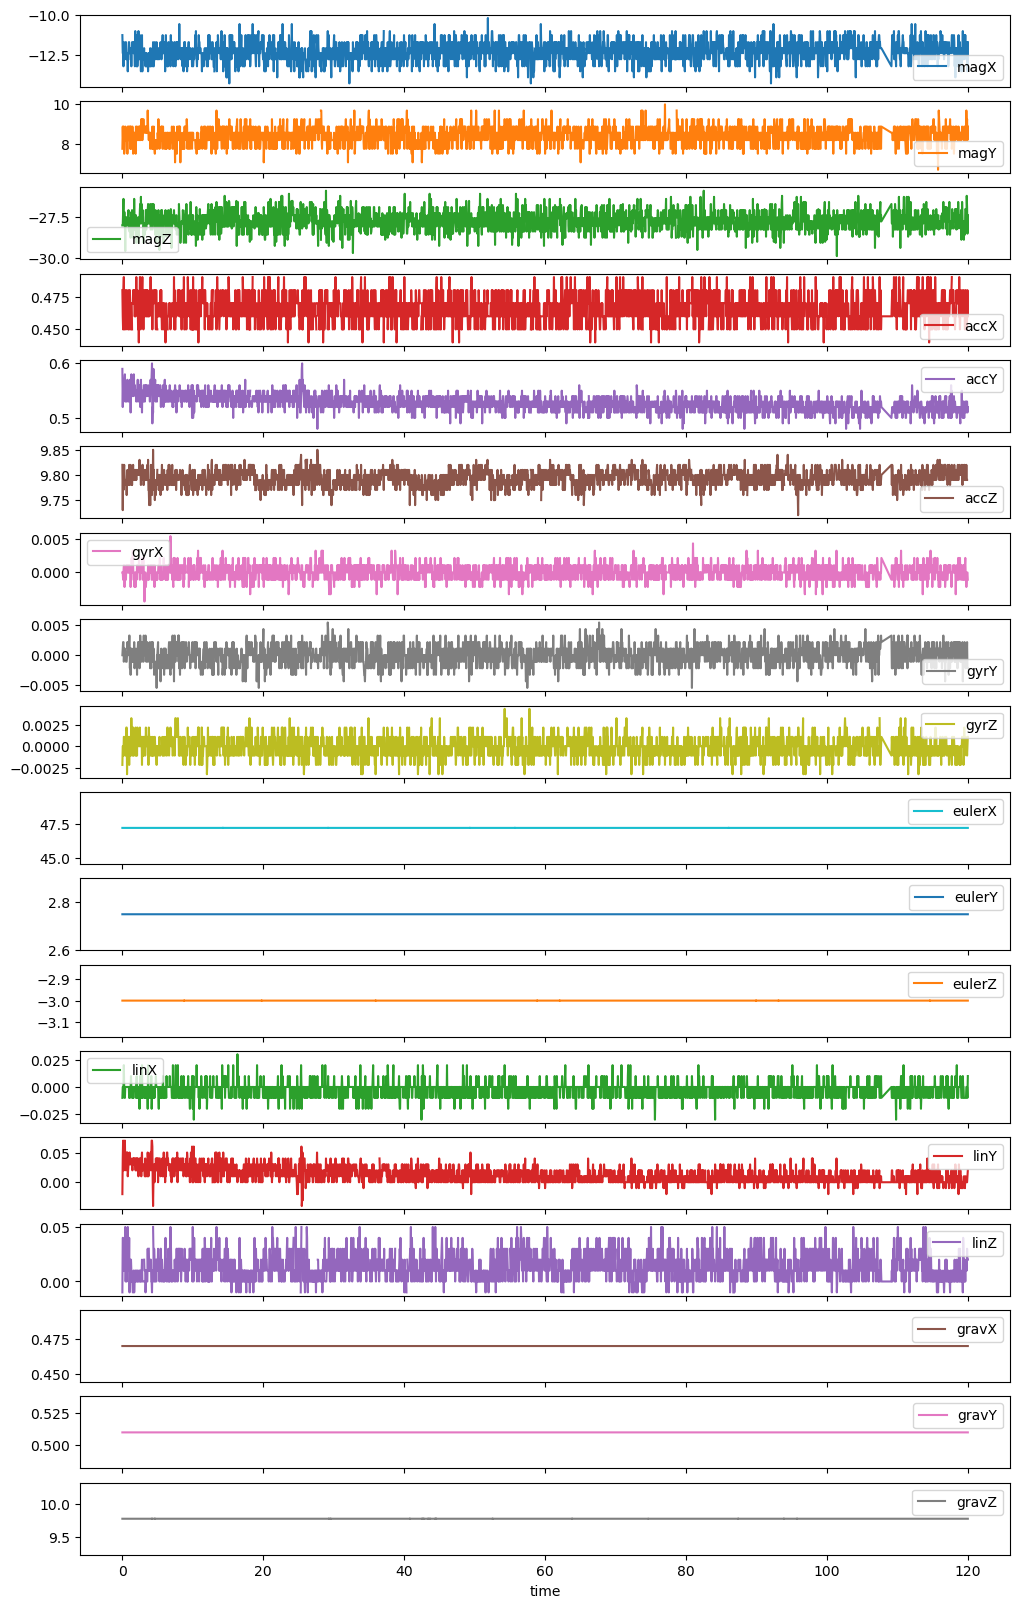

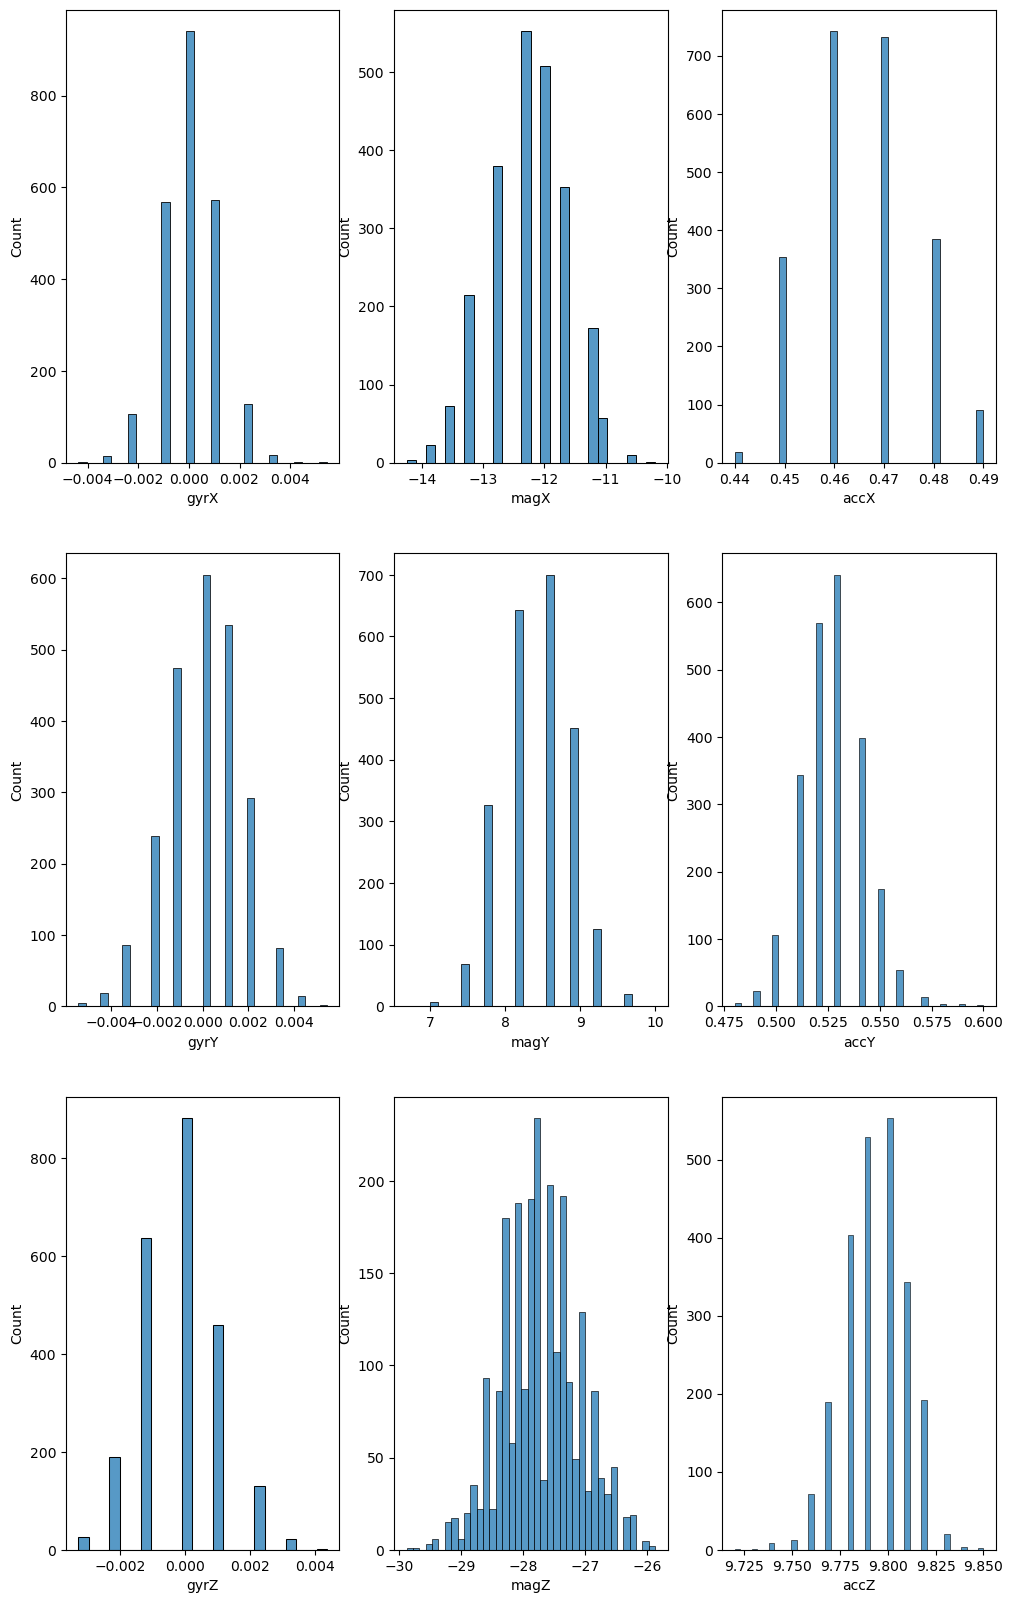

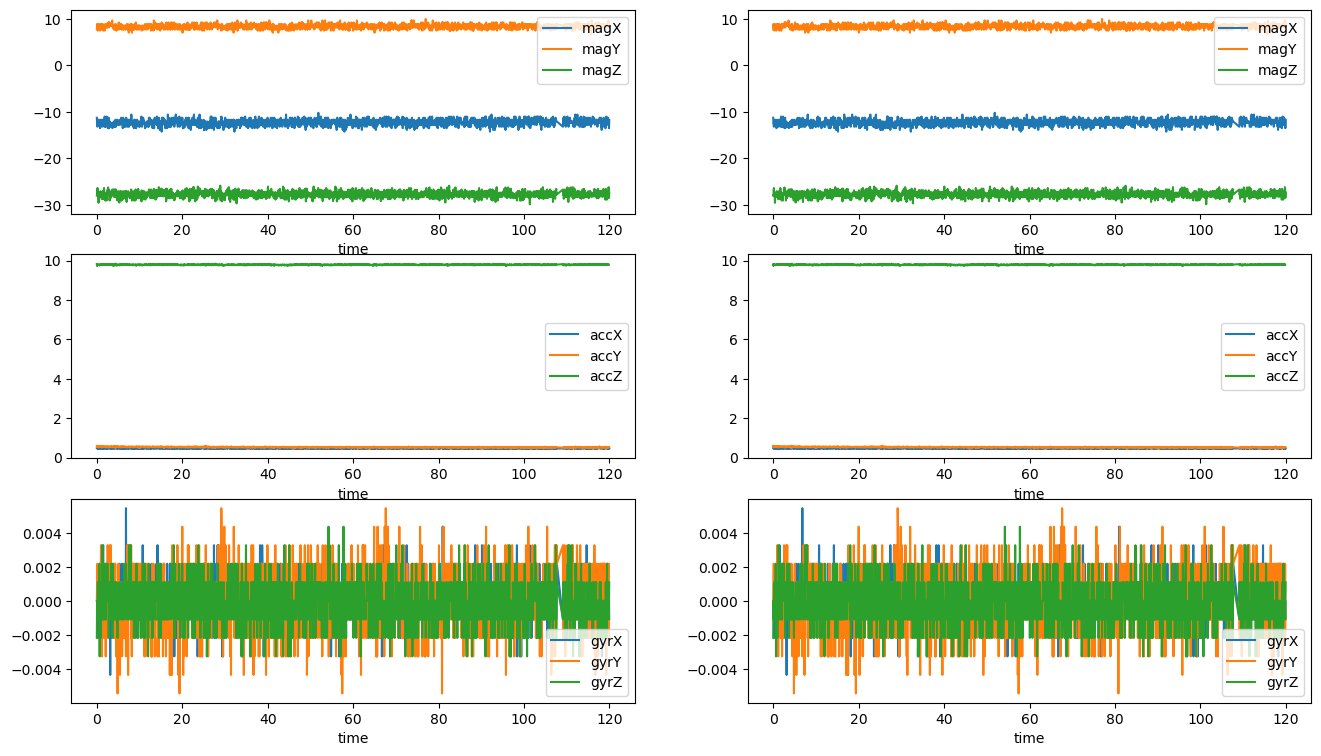

In [13]:
print("Distribution of IMU measurements before servo actuation without load")
up.plotIMU(df_IMU_L)
print("Distribution of IMU measurements after servo actuation without load")
up.plotIMU(df_IMU2_L)

up.compareIMUMeasurements(df_IMU_L, df_IMU2_L)

Test statistics of IMU measurments during servo actuation wihtout load, outliers removed
        mean     std   skew  kurtosis
magX  59.249  66.275  0.358    -1.441
magY  -3.185  60.195 -0.058    -1.275
magZ -33.456   4.620 -0.352    -1.212
accX   0.460   0.014  0.026     0.952
accY   0.439   0.035 -0.008    -0.180
accZ   9.799   0.017 -0.138     0.253
gyrX   0.000   0.001 -0.050     0.083
gyrY   0.000   0.002  0.080     0.128
gyrZ   0.000   0.006  2.608    40.388


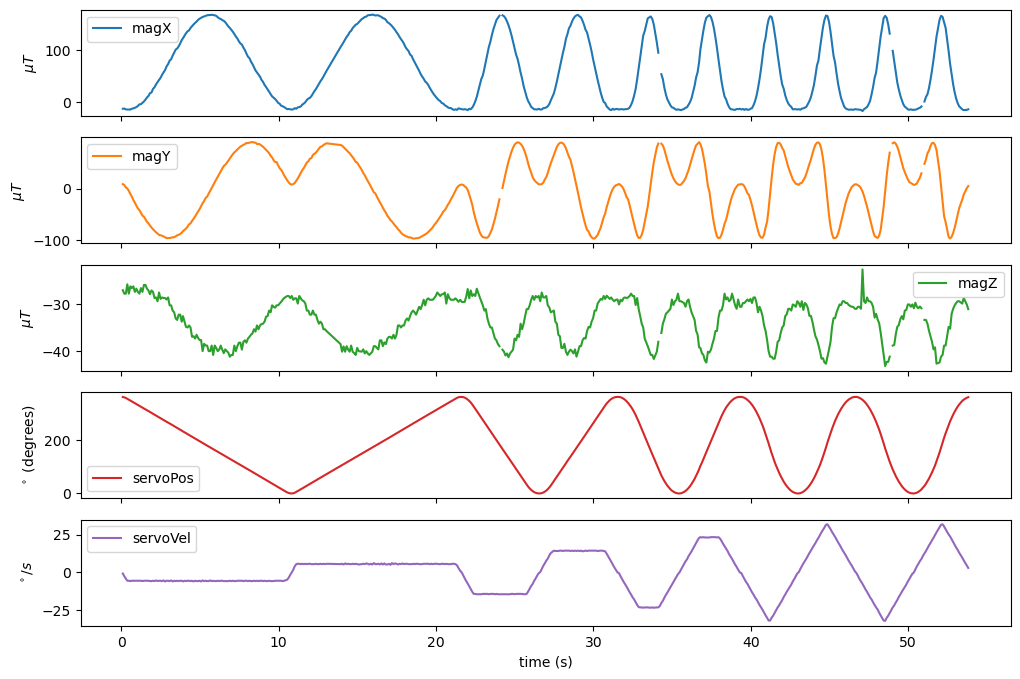

In [14]:
print("Test statistics of IMU measurments during servo actuation wihtout load, outliers removed")
up.displayStatistics(df_servo_La, filename="figuresAndResults//servoWithoutLoadTestStatistics.csv",)



axs = df_servo_La[['time', 'magX', 'magY', 'magZ', 'servoPos', 'servoVel']].set_index('time').plot(subplots=True, figsize=(12,8))
axs[0].set_ylabel(r'$\mu T$')
axs[1].set_ylabel(r'$\mu T$')
axs[2].set_ylabel(r'$\mu T$')
axs[3].set_ylabel(r'$^\circ$ (degrees)')
axs[4].set_ylabel(r'$^\circ/s$')
axs[4].set_xlabel('time (s)')
plt.show()

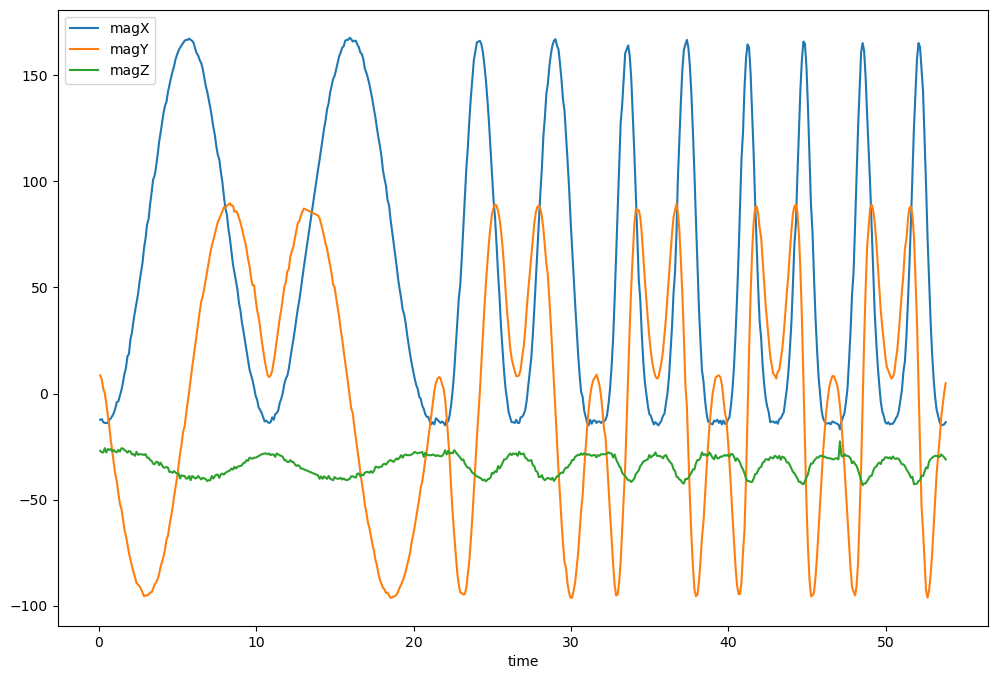

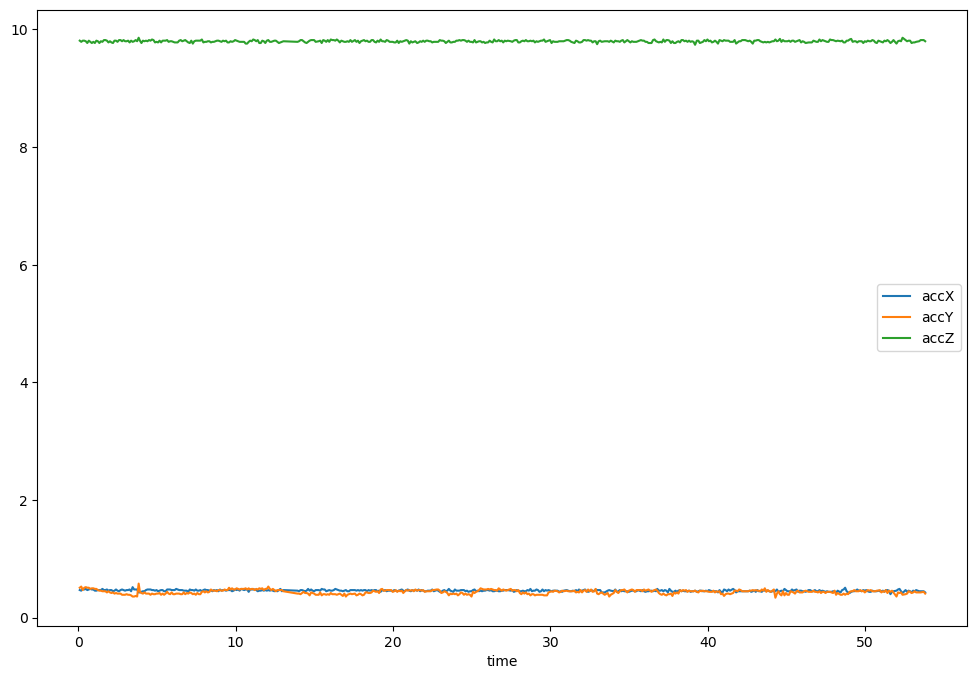

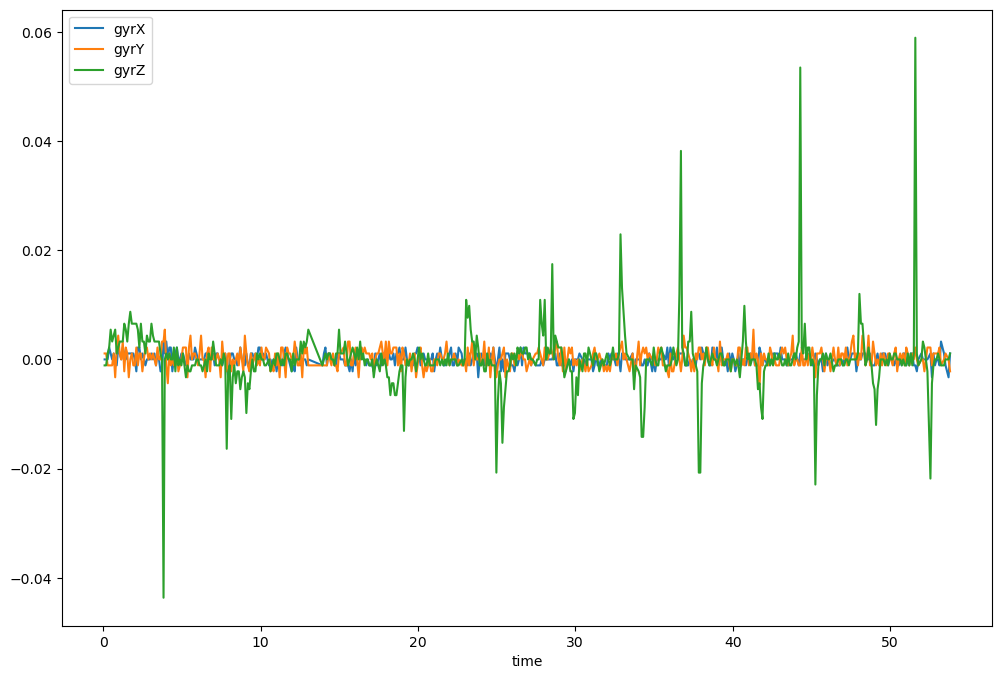

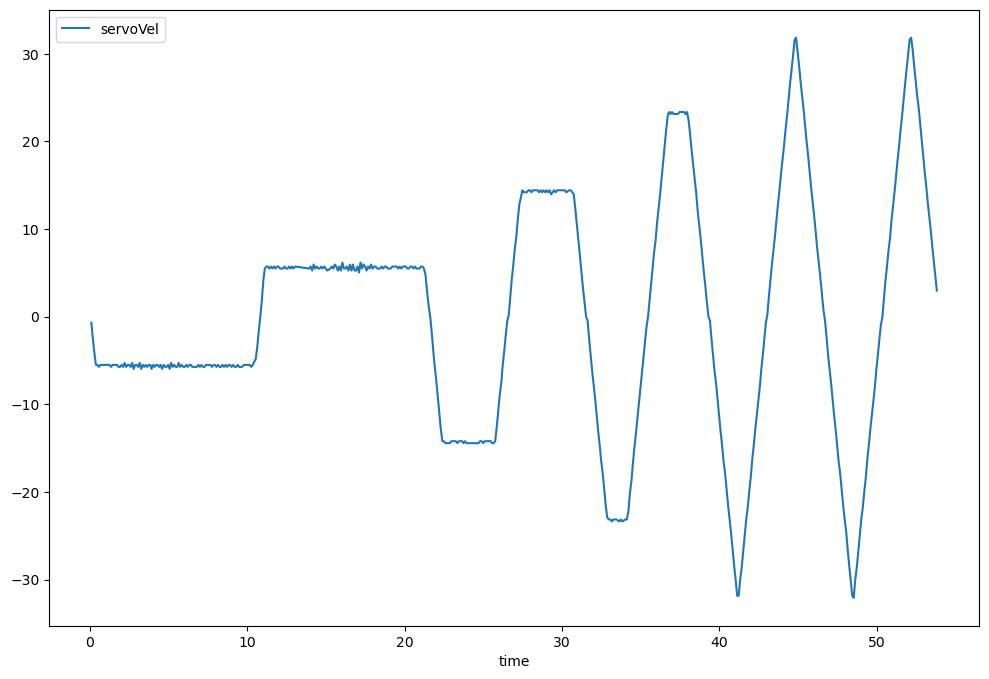

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


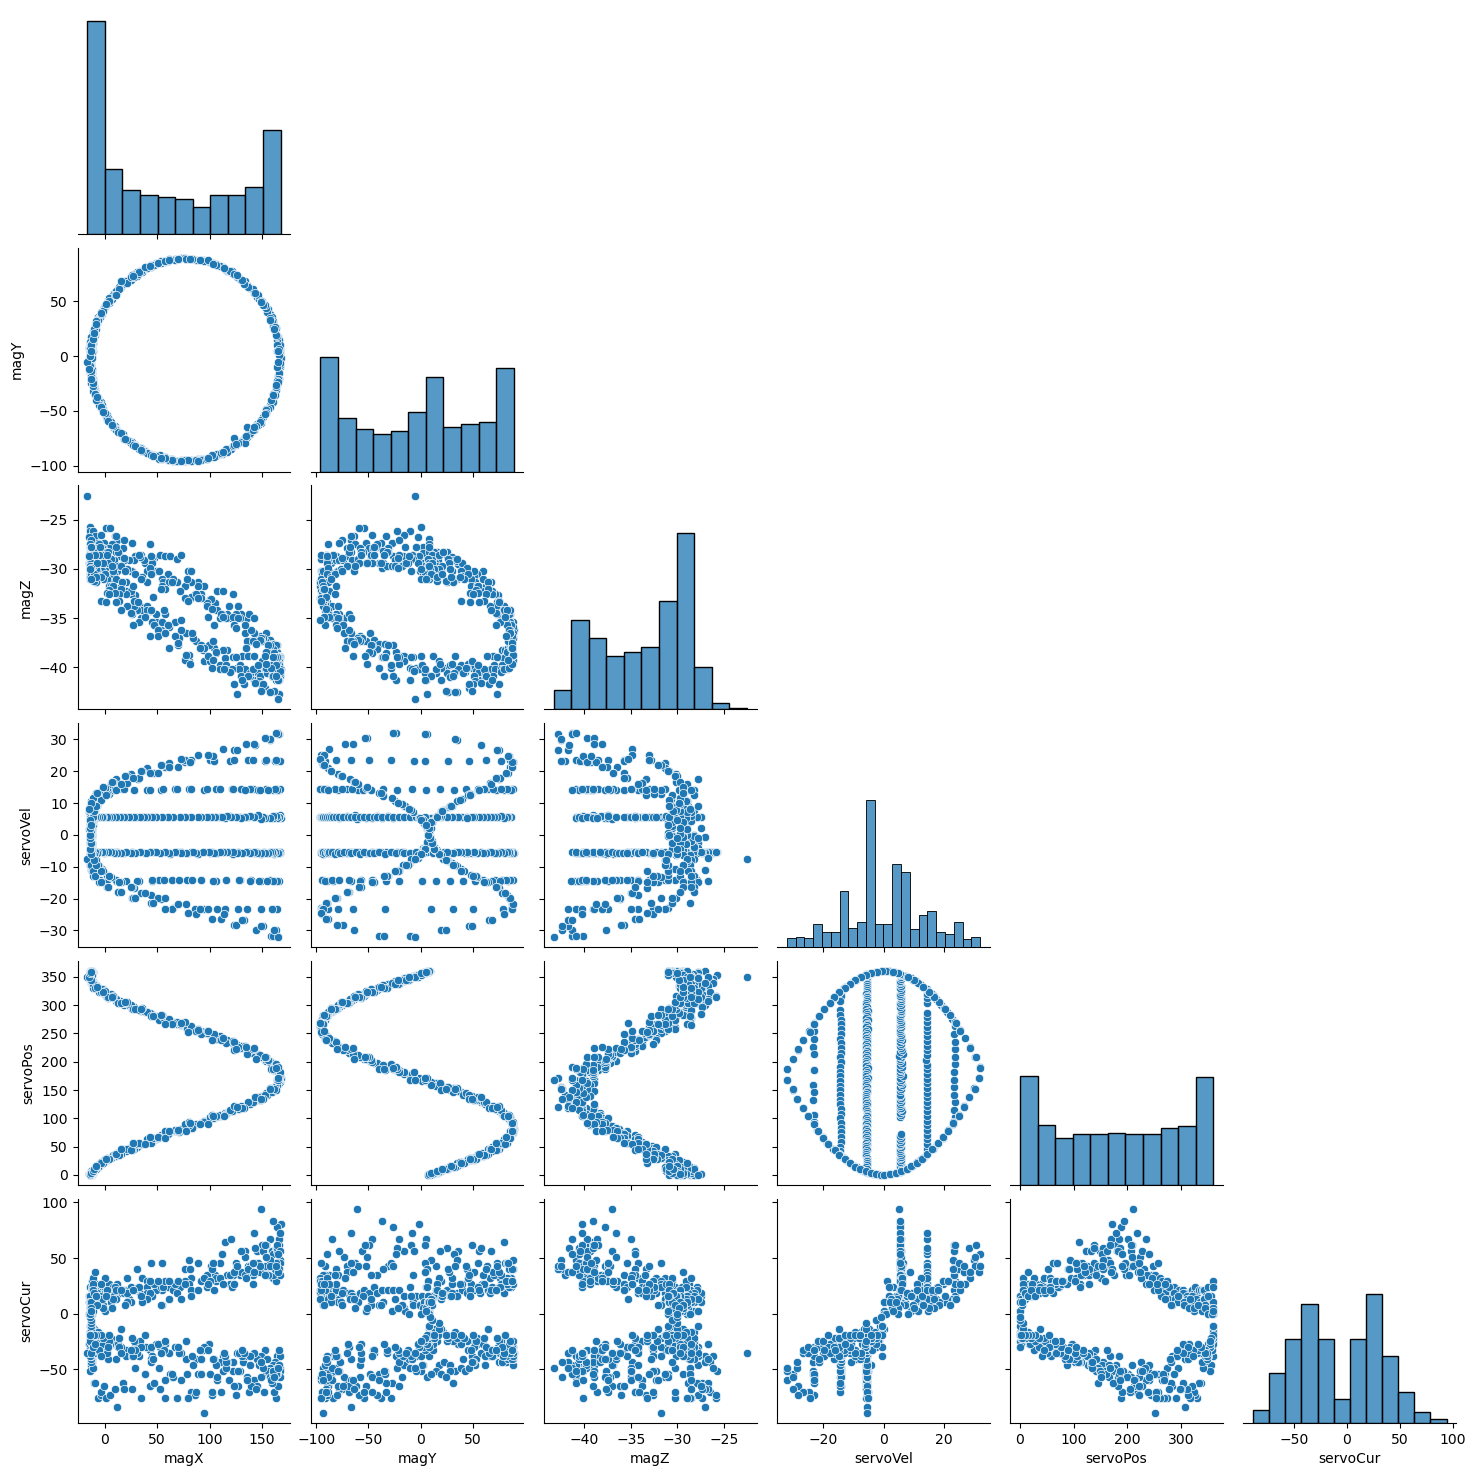

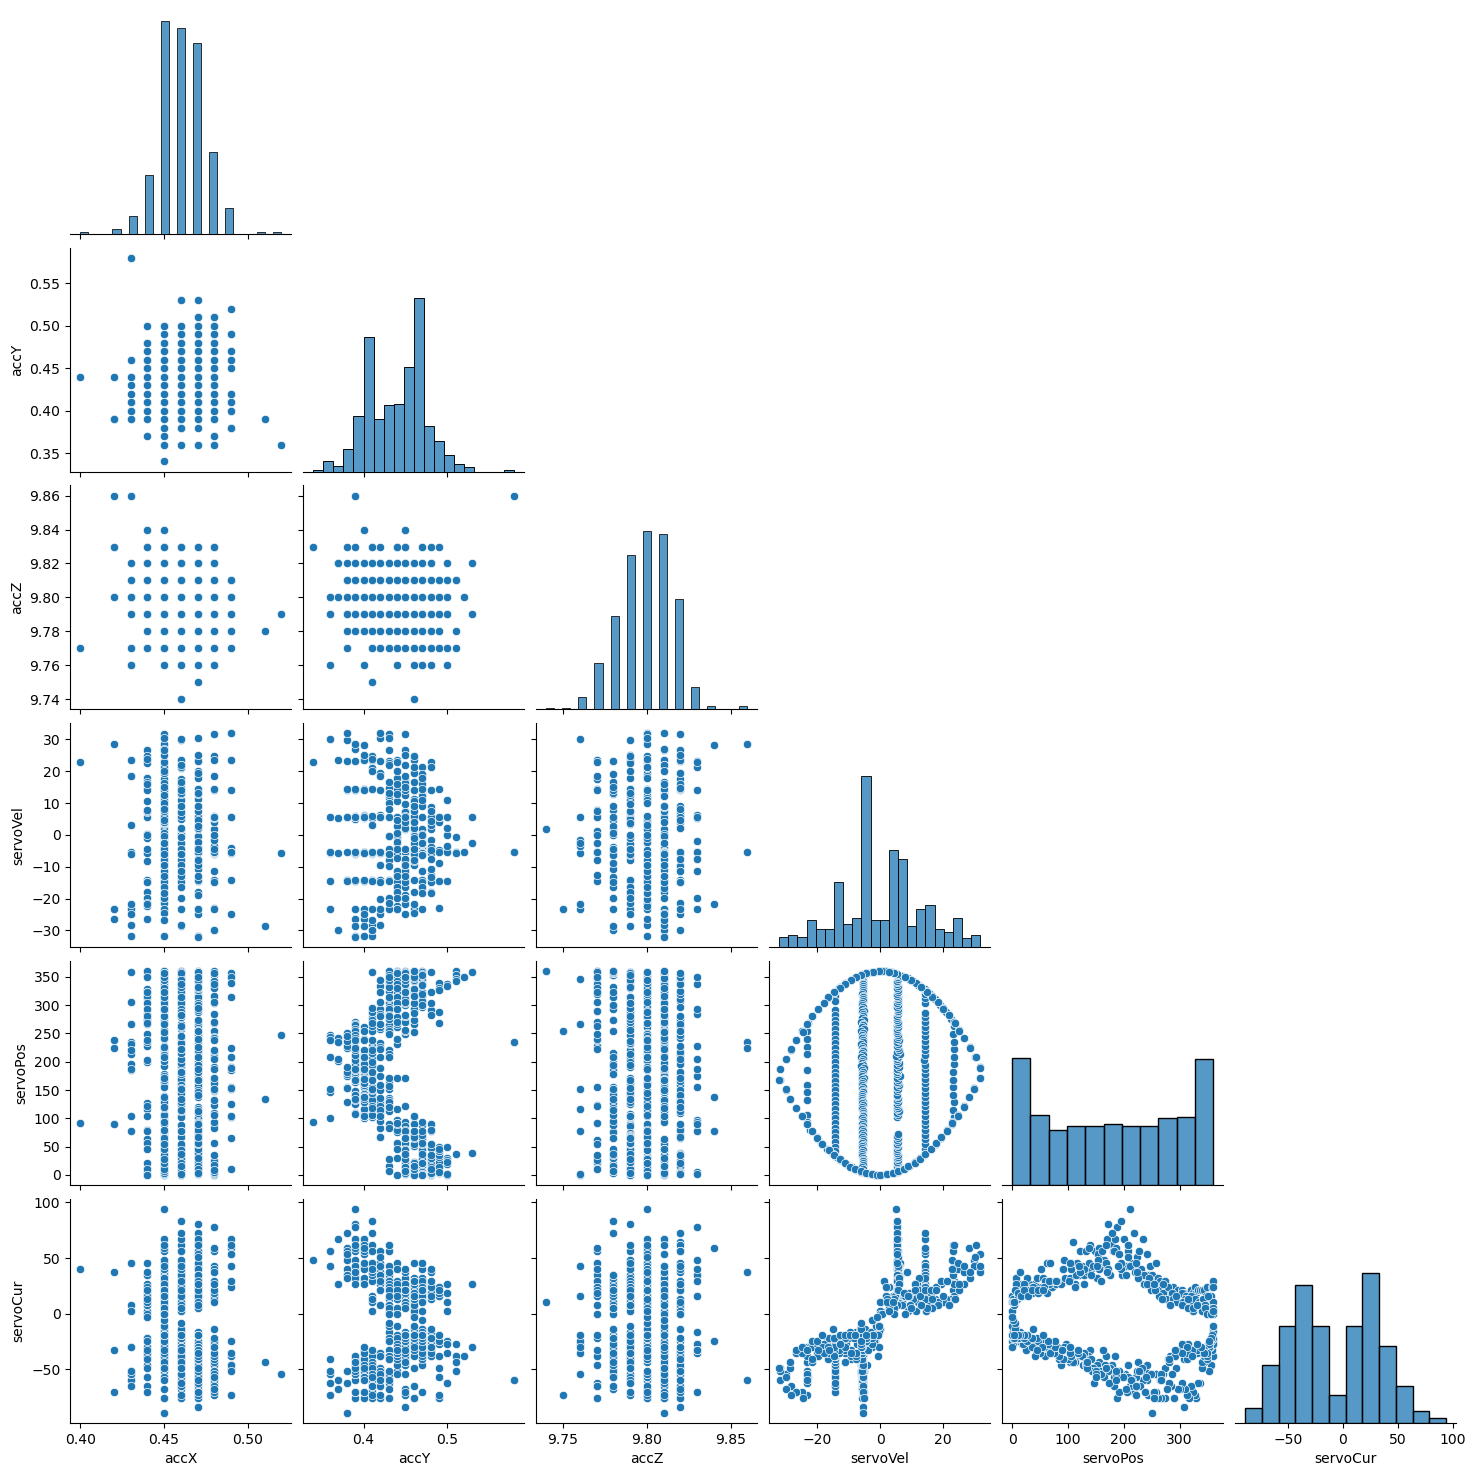

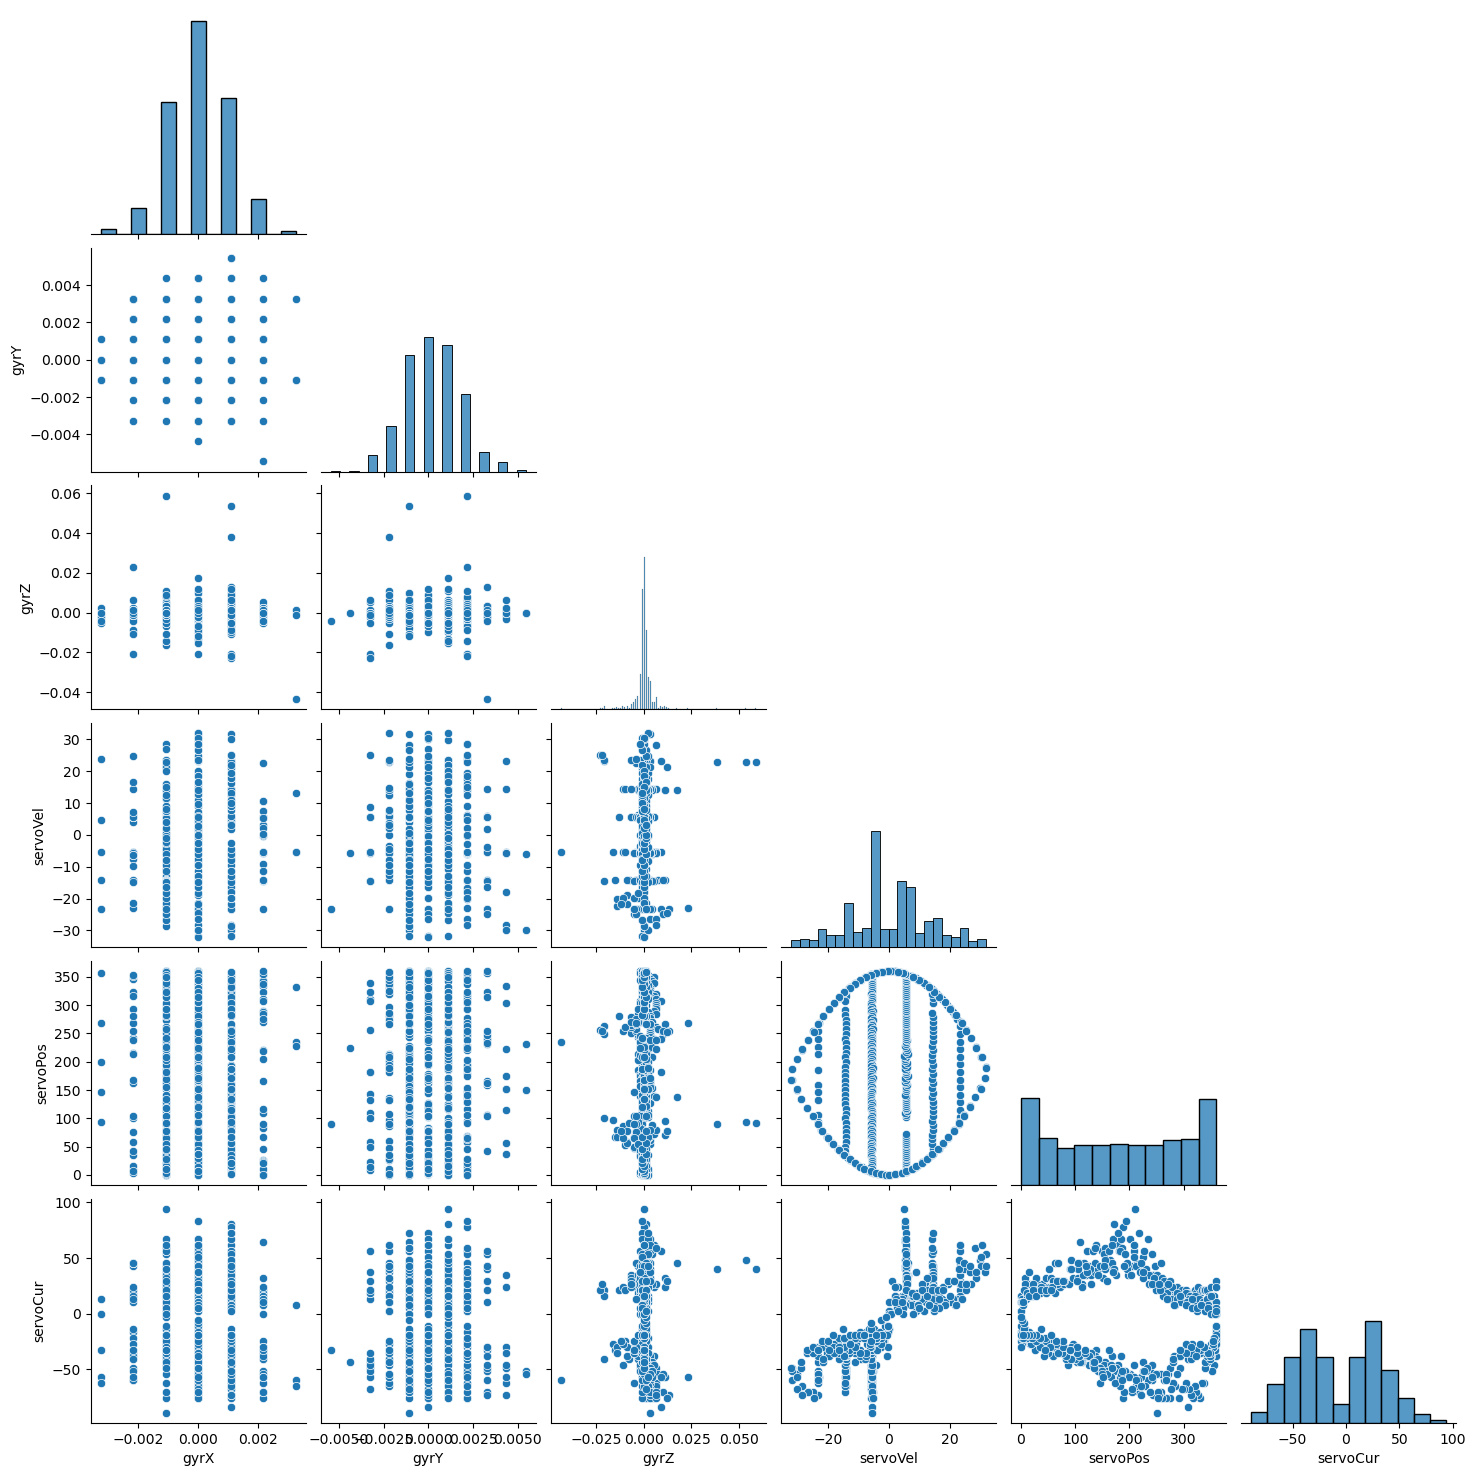

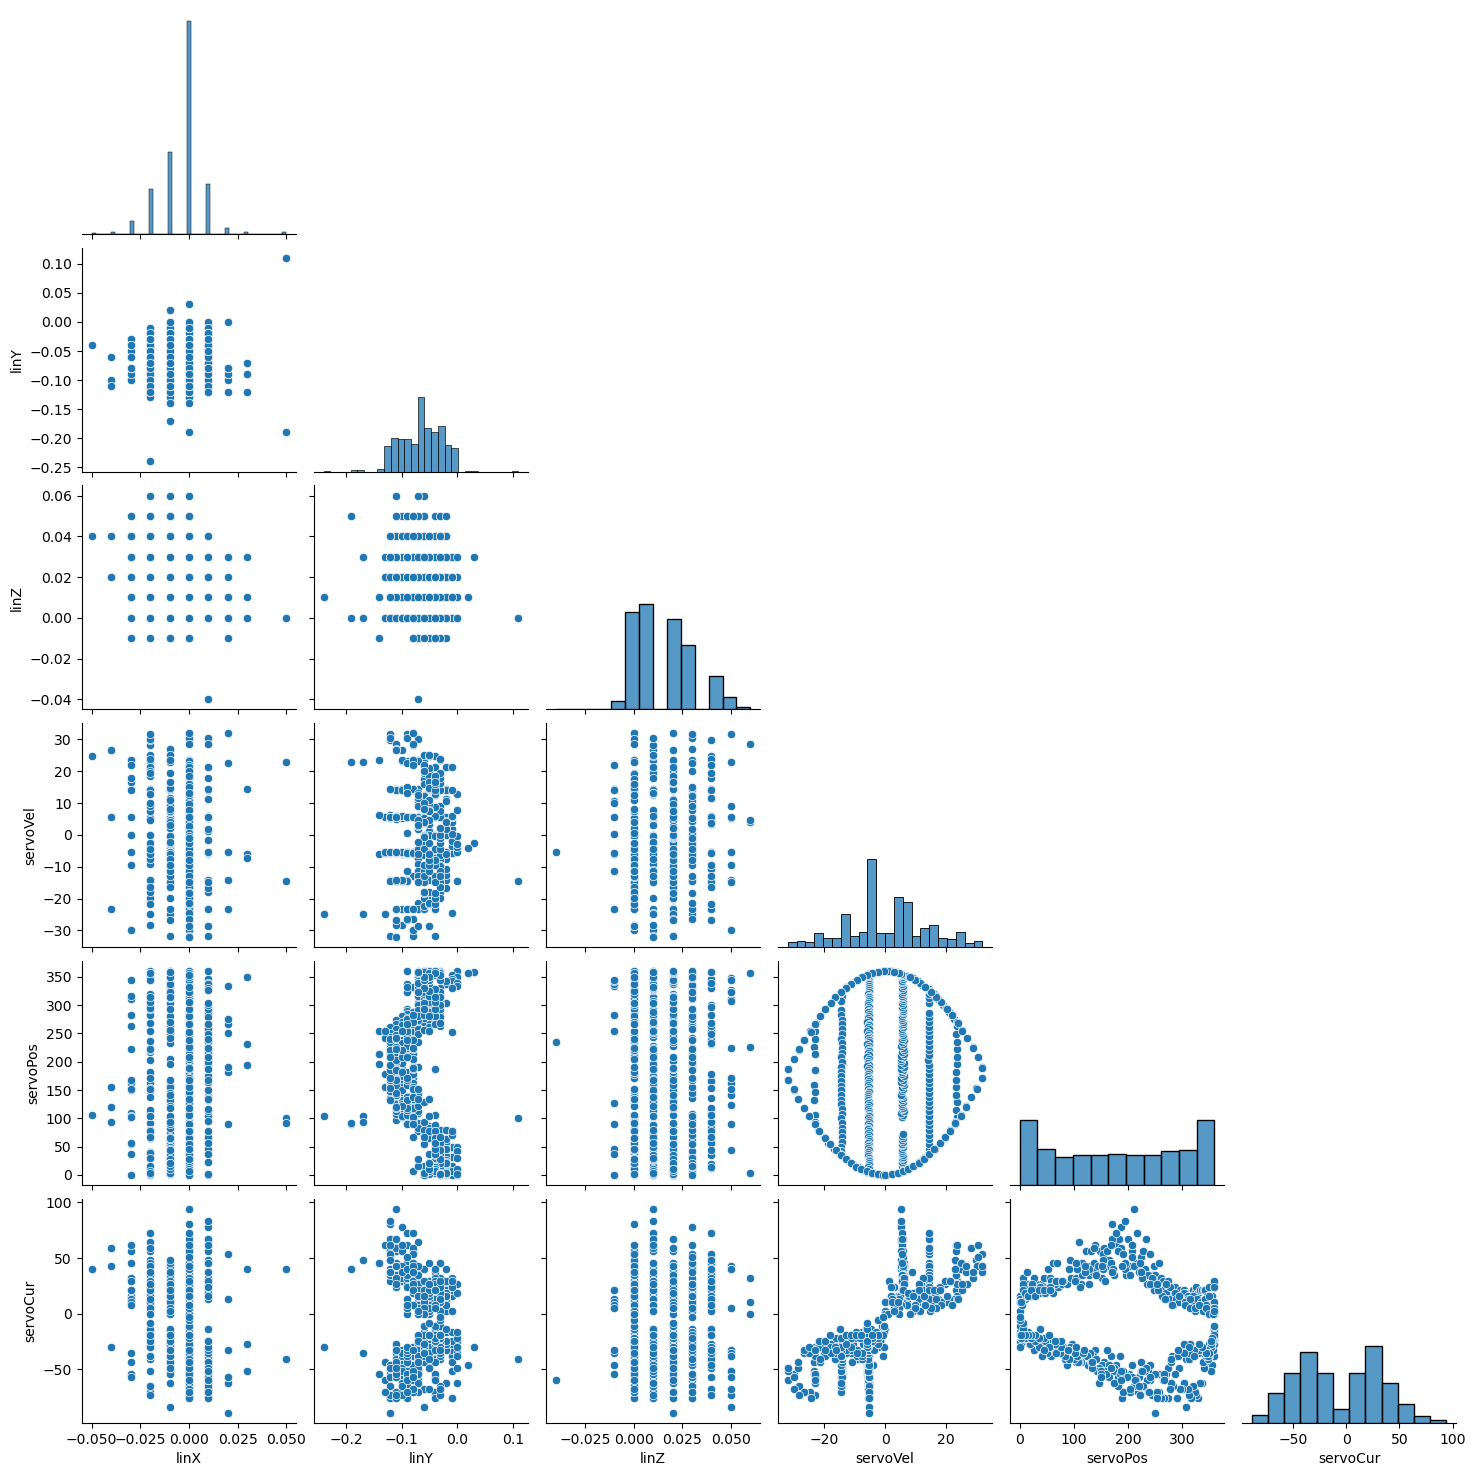

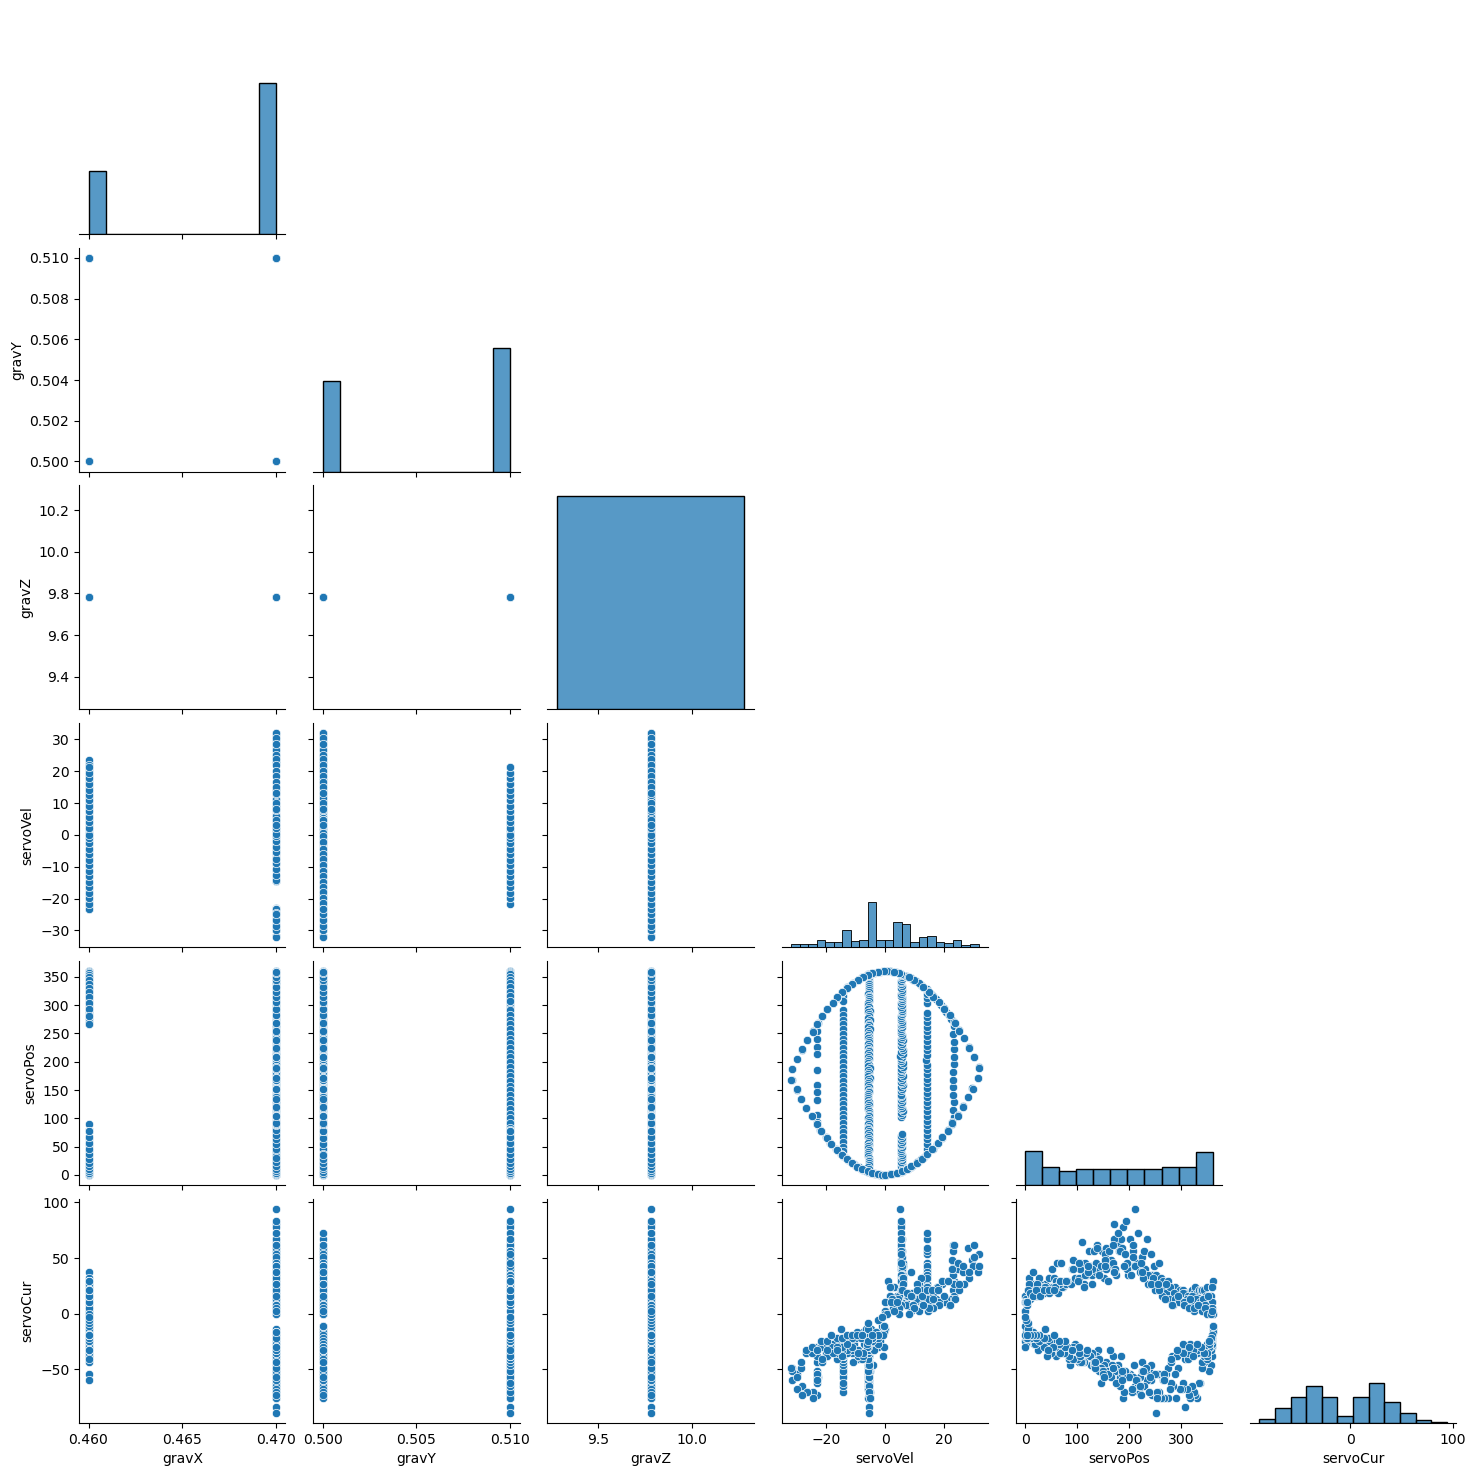

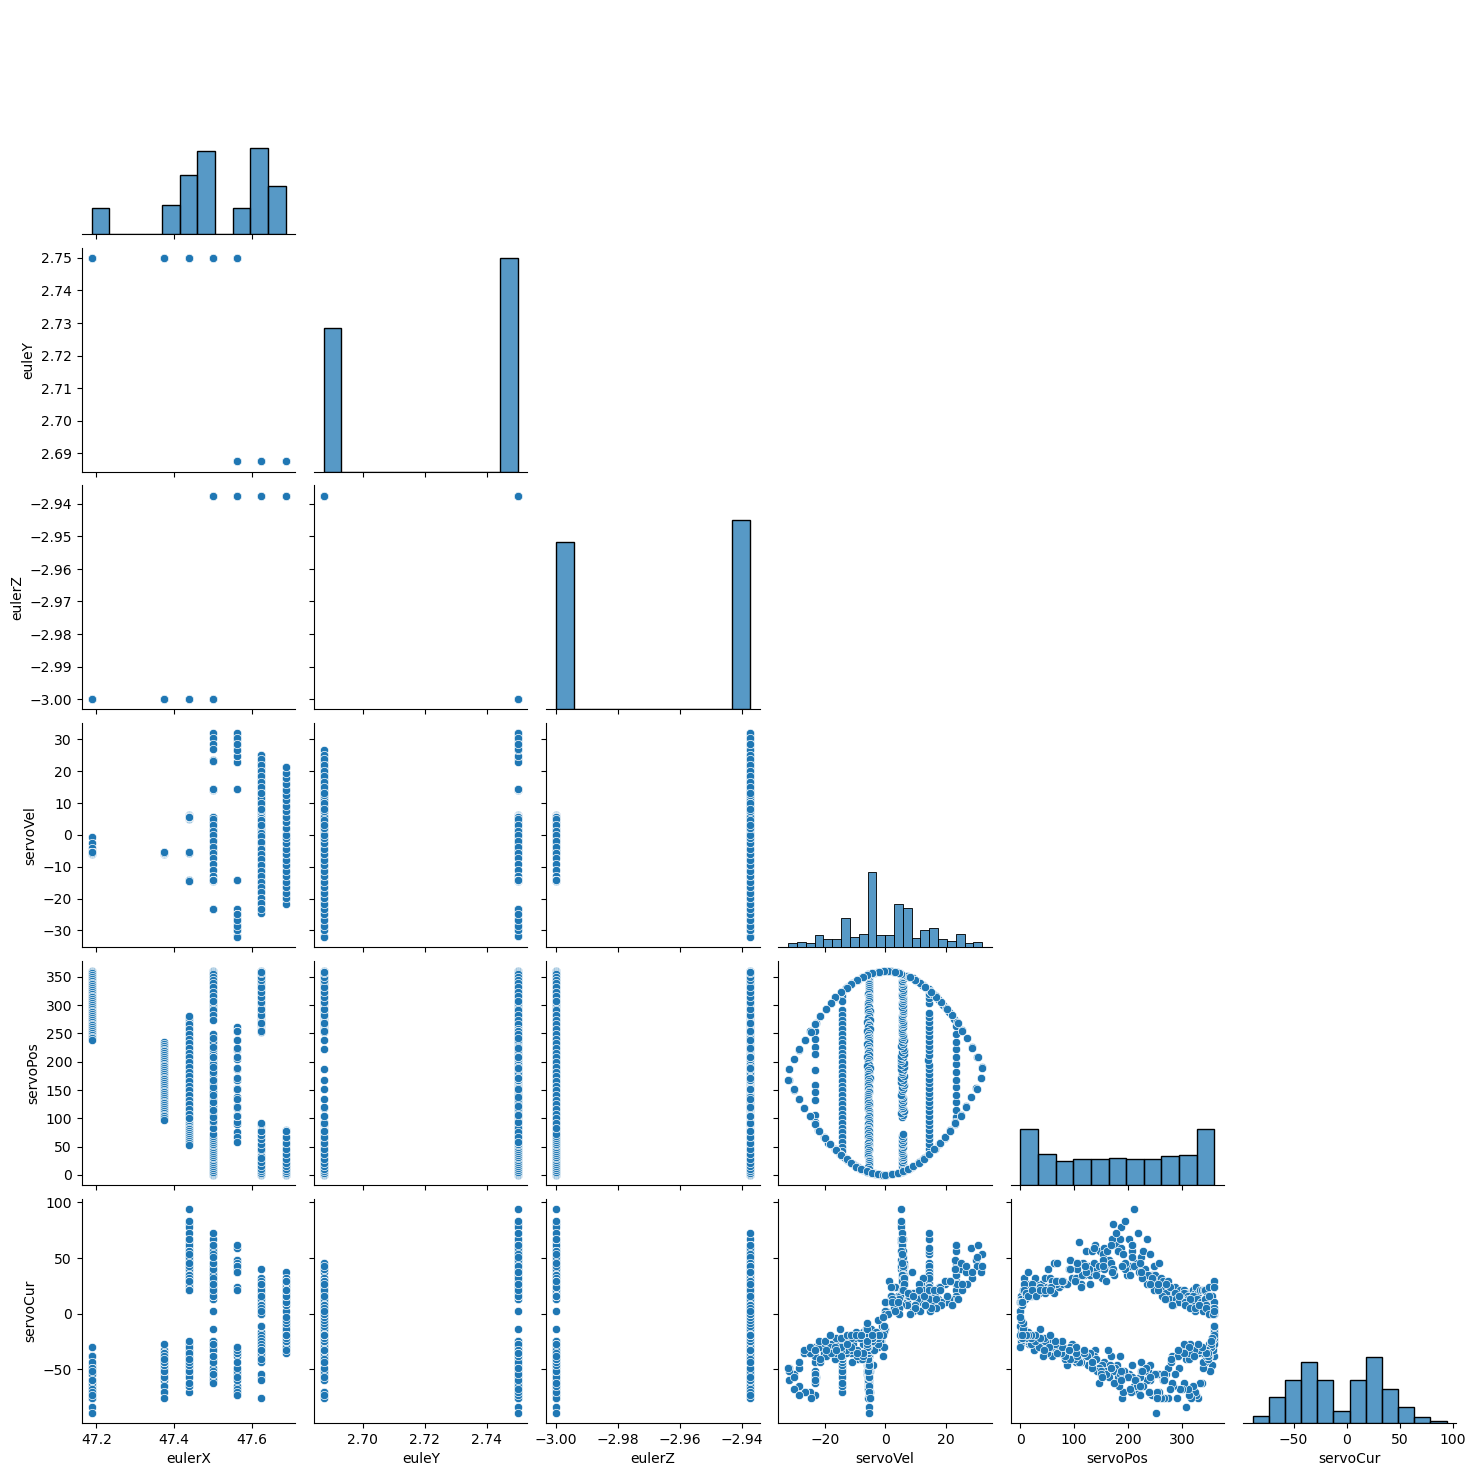

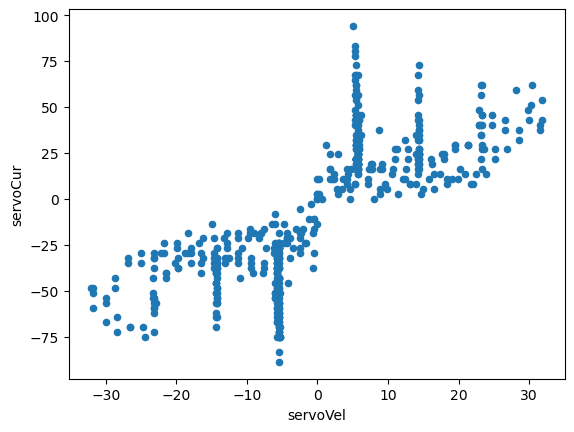

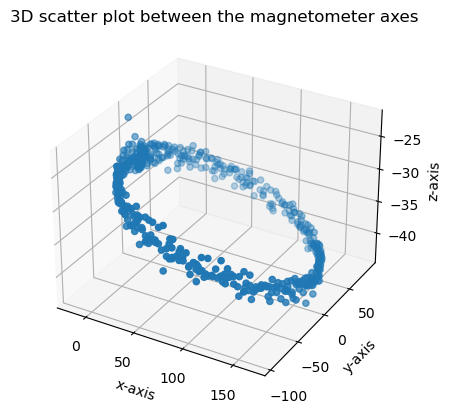

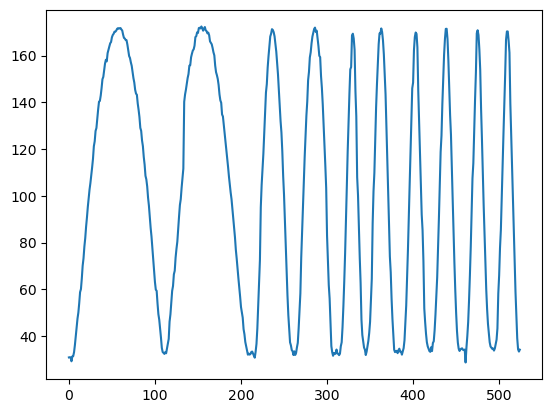

In [15]:
up.plotServo(df_servo_La, directory='../projectThesisTest1/newCurrentMeas/wLoad')

df_servo_La.plot.scatter(x = 'servoVel', y = 'servoCur')
 
fig = plt.figure()
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# plotting
ax.scatter(df_servo_La['magX'], df_servo_La['magY'], df_servo_La['magZ'], 'green')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_title('3D scatter plot between the magnetometer axes')
plt.savefig("3dplot.svg")
plt.show()

df_servo_La = df_servo_La.dropna()
abs = np.linalg.norm(df_servo_La[['magX', 'magY', 'magZ']].values,axis=1)

plt.plot(abs)